# ***Project Details***

***Title***: Guided Project

***Due Date***: 22 April 2025

***Contributors***: 
- Hayley Treutens (578003)
- Grace Kangausaru (601359)
- Gideon Nico Vermeulen (601281)
- Petrus Human (577842)

***GitHub Link***: 

===========================================================================================================================================
## ***Grade Class Prediction for BrightPath Academy***


## ***1. Problem Statment***
***Problem Statement***
*BrightPath Academy lacks a data-driven system to:*

- *Identify academically at-risk students in real-time.*
- *Tailor interventions (e.g., tutoring, mentoring) based on individual needs.*
- *Understand the influence of extracurricular activities on academic outcomes.*
- *Convert collected student data into actionable insights*

***Objective***

*This project is a comprehensive study conducted under BrightPath Academy, aimed at building a predictive model to identify which student-related features most significantly influence their academic grade classification. The primary goal of this project is to accurately predict a student's grade class based on input attributes.*

*The project uses a dataset adapted for academic performance analysis, originally titled “Student performance data”. This dataset will be repurposed and undergo a series of detailed data analysis and preprocessing steps. These include dataset analysis, univariate and bivariate analysis, handling missing data, removing duplicates, and addressing outliers.*

*Two predictive models will be developed and evaluated. Feature importance will be analyzed to understand the key drivers behind academic outcomes. Both models will be saved as pickle files for future reuse, with the second model undergoing cross-validation to enhance its reliability and performance.*

*Once validated, the most accurate model will be deployed using a web application built with DASH, offering an interactive interface for predicting student grade classifications. This web tool aims to provide educators and academic advisors with valuable insights to support student success and targeted interventions.*

*This project marks a significant step forward in integrating machine learning within educational contexts, helping BrightPath Academy and similar institutions leverage data for improved academic decision-making and student support strategies.*



***This notebook will take the following structure:***

    1. Problem Statment
    
    2. Load Data

    3. Inspect Data and Data Analysis
        A. Inspect Data
        B. Univariate Analysis
        C. Bi-variate Analysis
        
    4. Hypotheses
        A. Hypothesis 1
        B. Hypothesis 2
        C. Hypothesis 3
        D. Hypothesis 4
        E. Hypothesis 5
    
    5. Preprocess Data (Data Cleaning)
        A. Handling missing values
        B. Removing duplicates
        C. Data Type Conversion
        D. Outlier value Handling
        E. Remove Irrelevant Features
        
    6. Split Dataset
    
    7. Model 1
        A. Build Model
        B. Predictions of the Model
        C. Evaluation Metrics of the Model
        D. Feature Importance from the Model
        E. Cross Validation of Models
        E. Model Choice

    8. Improve Model 1
        A. Build Model
        B. Predictions of the Model
        C. Cross Validation With Baseline Models
        D. Create Pickle File

    7. Feature Engineering
    
    8. Model 2
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File
        
    9. Cross-Validate Models
    
    10. Web Application

===========================================================================================================================================

*Before any coding can take place, certain libraries in python need to be imported to perform different functions and make various features available
for use*

In [ ]:
# Data handling
import csv
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go

# Prediction and model storage
import pickle

# Classical ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# XGBoost
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, mean_absolute_error, 
    mean_squared_error, r2_score, explained_variance_score, 
    confusion_matrix, classification_report
)
from scipy import stats

# Deep Learning (Neural Networks)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers

# Web Application (Dash)
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State

# Supress Warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## ***2. Load Data***
*The csv file named Student_performance_data is read so that the unclean data contained in this file can be analysed.*

In [ ]:
# DataFrame from csv file
path = './Student_performance_data .csv'
raw_data = pd.read_csv(path)
raw_data_copy = raw_data
raw_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## ***3. Inspect Data and Data Analysis***

### ***A. Inspect Data***
#### ***Dataset Features***
- *Feature variable - Independent variables that are not changed by other variables (Denoted by X in ML)*
- *Target variable - Dependent variables that are to be predicted and depend on other variables (Dentoed by Y in ML)*

In [ ]:
#Analyse columns and rows
raw_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


***Insight Gained***
- *Feature names are consistent and do not require and data processing for standardisation.*
- *The dataset has 14 feature variables.*
- *And a single target variable:  GradeClass.*
- *This variable will be the predicted variable of the models.*

#### ***Dataset Datatypes***

*Features can have different datatypes, such as numerical, categorical or ordinal. Knowing the datatype of each feature is important because it determines what kind of statistical analysis or data processing is required.*

In [ ]:
print(f'Raw data types: \n{raw_data_copy.dtypes}')

Raw data types: 
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


***Insight Gained***:
- *All features either have a datatype of an integer or floating point*
- *This indicates that no regirous conversions are need except possibly converting the GradeClass to an integer to better suit its category nature*
- *This conversion can be fixed in the data processing section.*

#### ***Data Shape***

*Knowing the number of rows in the dataset can provide a better understanding of the volume of the data available.*

In [ ]:
print(f'The data has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

The data has 2392 rows and 15 columns


***Insight Gained***
- *Raw data rows: 2392*
- *Raw data columns: 15*

#### ***Data Statistics***
*Knowing some of the datasets's feature statistics such as mean, count, minimum and maximum values can provide insight into what data the data looks like.*

In [ ]:
raw_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


#### ***Verify Feature Value Range***
*BrightPath Academy provide a list of the valid ranges and category values that all their data should adhere to. By identifying what features have invalid data can help provide insight into what needs to be cleaned in the data processing section.*

In [ ]:
# Check if StudentID values are between 1001 and 3392 (inclusive)
in_range = raw_data['StudentID'].between(1001, 3392).all()
print(in_range)  

True


In [ ]:
#Age range (between 15-18)
raw_data['Age'].value_counts()

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

In [ ]:
#Gender range (male= 0 , female = 1)
raw_data['Gender'].value_counts()

Gender
1    1222
0    1170
Name: count, dtype: int64

In [ ]:
#Ethnicity range (caucasian = 0, african american = 1, asian = 2, other = 3)
raw_data['Ethnicity'].value_counts()

Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64

In [ ]:
#Parental Education range (none = 0, high school = 1, some college =2, bachelor's = 3, higher study = 4)
raw_data['ParentalEducation'].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

In [ ]:
# Check if StudyTimeWeekly values are between 0 and 20 (inclusive)
in_range = raw_data['StudyTimeWeekly'].between(0, 20).all()
print(in_range)

True


In [ ]:
# Check if Absences values are between 0 and 30 (inclusive)
in_range = raw_data['Absences'].between(0, 30).all()
print(in_range)

True


In [ ]:
#Tutoring range (no = 0, yes = 1)
raw_data['Tutoring'].value_counts()

Tutoring
0    1671
1     721
Name: count, dtype: int64

In [ ]:
#Parental Support range (none = 0, low = 1, moderate =2, high = 3, very high = 4)
raw_data['ParentalSupport'].value_counts()

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

In [ ]:
#Extracurricular range (no = 0, yes = 1)
raw_data['Extracurricular'].value_counts()

Extracurricular
0    1475
1     917
Name: count, dtype: int64

In [ ]:
#Sports range (no = 0, yes = 1)
raw_data['Sports'].value_counts()

Sports
0    1666
1     726
Name: count, dtype: int64

In [ ]:
#Music range (no = 0, yes = 1)
raw_data['Music'].value_counts()

Music
0    1921
1     471
Name: count, dtype: int64

In [ ]:
#Volunteering range (no = 0, yes = 1)
raw_data['Volunteering'].value_counts()

Volunteering
0    2016
1     376
Name: count, dtype: int64

In [ ]:
# Check if GPA values are between 0.0 and 4.0 (inclusive)
in_range = raw_data['GPA'].between(0.0, 4.0).all()
print(in_range)

True


In [ ]:
# Identify the number of GPA values not in the average GPA range (2.0 - 4.0)
in_range = raw_data['GPA'].between(2.0, 4.0).value_counts()
print(in_range)

GPA
False    1274
True     1118
Name: count, dtype: int64


In [ ]:
#GradeClass range (A = 0, B = 1, C = 2, D = 3 F = 4)
raw_data['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

***Insight Gained***
- *All StudentID values are valid  (Range: 1001-3392)*
- *All Age values are valid (Range: 15-18)*
- *All Gender values are valid (Categories: male = 0 and female = 1)*
- *All Ethnicity values are valid (Categories: caucasian = 0 , african american = 1, asian = 2, other = 3)*
- *All ParentalEducation values are valid (Categories: none = 0 , high school = 1, some college = 2, bachelor's = 3, higher study = 4)*
- *All StudeyTimeWeekly values are valid (Range: 0-20)*
- *All Absence values are valid (Range: 0-30)*
- *All Tutoring values are valid (Categories: no = 0 and yes = 1)*
- *All ParentalSupport values are valid (Categories: none = 0 , low = 1, moderate = 2, high = 3, very high = 4)*
- *All Extracurricular values are valid (Categories: no = 0 and yes = 1)*
- *All Sports values are valid (Categories: no = 0 and yes = 1)*
- *All Music values are valid (Categories: no = 0 and yes = 1)*
- *All Volunteering values are valid (Categories: no = 0 and yes = 1)*
- *All GPA values are valid (Range: 0.0-4.0)*
- *All GradeClass values are valid (Categories: A = 0 , B = 1, C = 2, D = 3, E = 4)*

*Additionally, we can see that based on the schools average GPA range (2.0 - 4.0) we identified:*
- *1118 students fall into the range*
- *1274 student are below the average range*

*This provides insight about the number of students falling short of the school average that could be considered part of the at-risk student group.*

*It is also important to note that there is a major imbalance in entries per GradeClass that should be addressed to reduce bias in favour of the F(4) grade. The models may also struggle to accurattely predict the minority classes like A(0) and B(1).*

### ***B. Univariate Analysis***
*Univariate analysis is the process of analysing individual variables one at a time. This is the most basic type of data analysis to find patterns in the data.*

#### ***Independent Features***
*These feature include:*

***Irrelevant (Will not be analysed as it is a unique feature)***
- *StudentID*

***Numerical***
- *Age*
- *StudyTimeWeekly*
- *Absences*
- *GPA*

***Categorical (Binary)***
- *Gender*
- *Tutoring*
- *Extracurricular*
- *Sports*
- *Music*
- *Volunteering*

***Categorical (ordinal)***
- *Ethnicity*
- *ParentalEducation*
- *ParentalSupport*




***Independent (Numeric)***

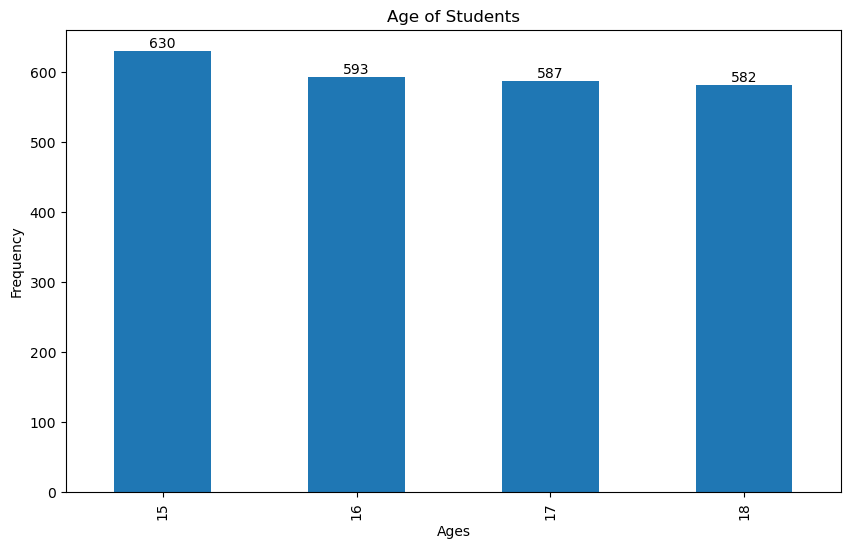

In [ ]:
#Age
plt.figure(figsize=(10, 6))
count = raw_data_copy['Age'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Age of Students', 
    xlabel = 'Ages',
    ylabel = 'Frequency'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 30)  
plt.show()

***Insight Gained***
- *630 students are 15 years old*
- *593 students are 16 years old*
- *587 students are 17 years old*
- *582 students are 18 years old*

*This even distribution suggests that there is no significant age group dominance in the dataset. The data does not display any extreme outliers or noticeable skewness.This lack of skew implies that age may not be a strong predictor of GradeClass.*

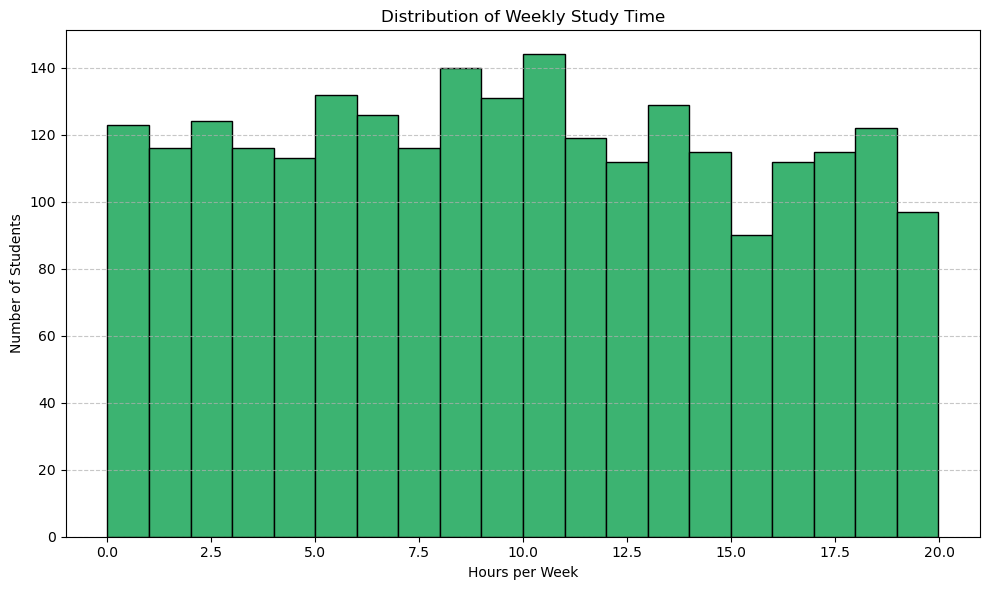

In [ ]:
#StudyTimeWeekly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(raw_data_copy['StudyTimeWeekly'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Weekly Study Time')
plt.xlabel('Hours per Week')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *Even distribution*
- *Frequency is unimodal*
- *No noticable skewness (symmertrical)*
- *No extreme peaks (possibly no outliers)*

*Since there's no single standout study time it may indicate that other factors like parental support, tutoring, or extracurriculars might be influencing GradeClass more significantly than just raw hours studied.

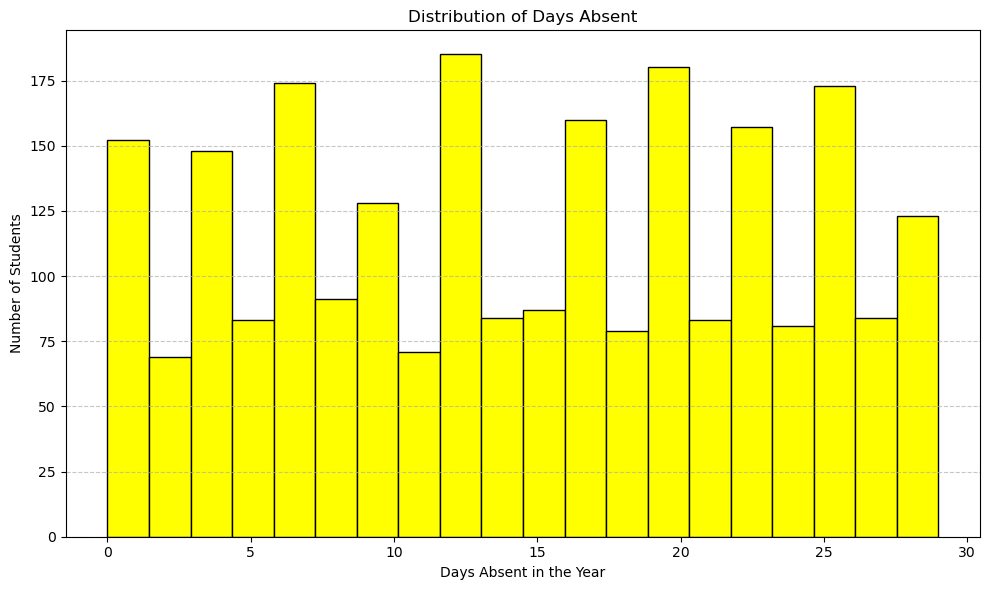

In [ ]:
#StudyTimeWeekly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(raw_data_copy['Absences'], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Days Absent')
plt.xlabel('Days Absent in the Year')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *Somewhat even distribution*
- *Frequency is multi-modal*
- *No noticable skewness (symmertrical)*
- *Spread is variable*
- *No extreme peaks (possibly no outliers)*

*The diverse range might impact academic performance inconsistently therefore exploring if higher absenteeism correlates with lower GradeClass or performance metrics.*

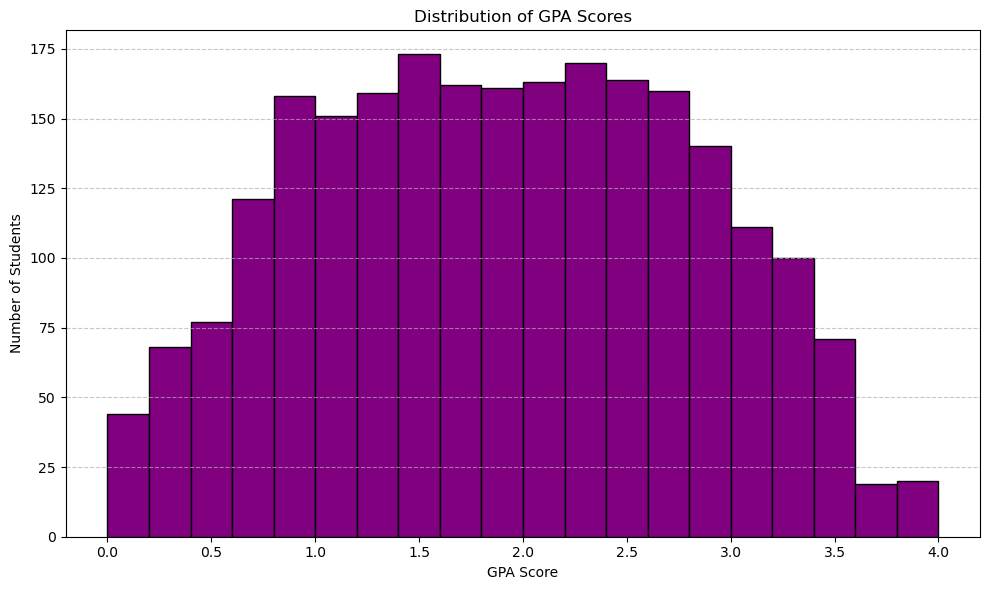

In [ ]:
#GPA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(raw_data_copy['GPA'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of GPA Scores')
plt.xlabel('GPA Score')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *Bell-shaped curve that indicates a roughly normal distribution*
- *Frequency is unimodal*
- *Slight negative skewness*

*The academic performance seems to cluster around average values (1.0 - 2.5), with fewer high-achieving students. This might point to factors like attendance, parental support or tutoring affecting student GradeClass.*

***Independent (Binary)***

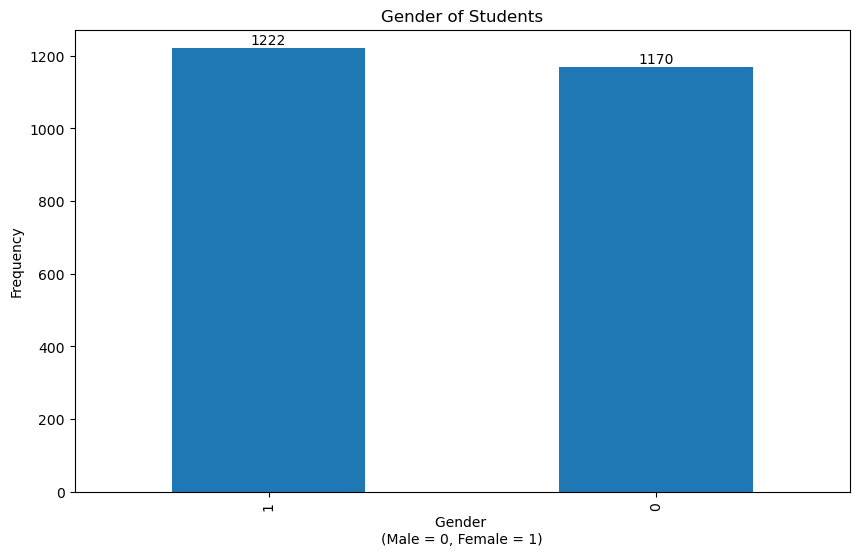

In [ ]:
#Gender
plt.figure(figsize=(10, 6))
count = raw_data_copy['Gender'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Gender of Students', 
    xlabel = 'Gender \n(Male = 0, Female = 1)',
    ylabel = 'Frequency'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 50) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1170 students are Male (0)*
- *1222 students are Female (1)*

*This almost even split indicates that the dataset is not biased toward a particular gender. Since the difference in counts is relatively small, it's reasonable to assume that gender may not play a dominant role in determining GradeClass. However, it’s still valuable to explore potential subtle performance trends between genders using bivariate analysis later on.*

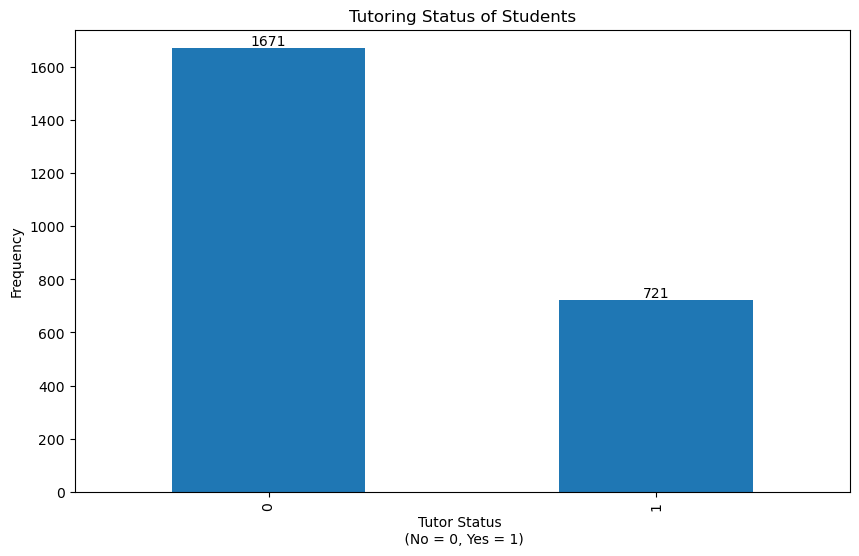

In [ ]:
#Tutoring
plt.figure(figsize=(10, 6))
count = raw_data_copy['Tutoring'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Tutoring Status of Students', 
    xlabel = 'Tutor Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *721 students did not recieve tutoring (0)*
- *1671 students recieved tutoring (1)*

*The relatively lower count of non-tutored students might indicate that lack of tutoring could be associated with lower academic performance, potentially resulting in a lower GradeClass.This distribution pattern implies that tutoring may play an important role in student outcomes and could be a strong predictor in the model. A bivariate analysis comparing Tutoring and GradeClass would be helpful to explore this relationship further.*

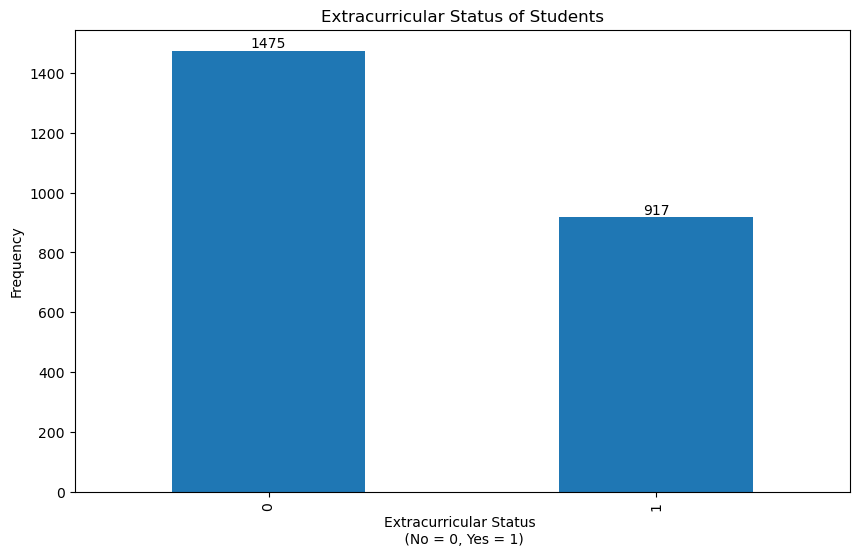

In [ ]:
#Extracurricular
plt.figure(figsize=(10, 6))
count = raw_data_copy['Extracurricular'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Extracurricular Status of Students', 
    xlabel = 'Extracurricular Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1475 students don't have any extracurriculars (0)*
- *917 students have extracurriculars (1)*

*This suggests that fewer students are involved in extracurriculars. The distribution could imply that students not engaged in extracurriculars might be focusing more on academics, or alternatively, that those involved in activities may have better time management and support systems—potentially affecting their GradeClass. However, without further analysis, it's unclear whether participation improves or reduces performance. A bivariate analysis between Extracurricular and GradeClass is needed to determine the nature of the relationship and whether it has a positive, negative, or negligible effect on academic outcomes.*

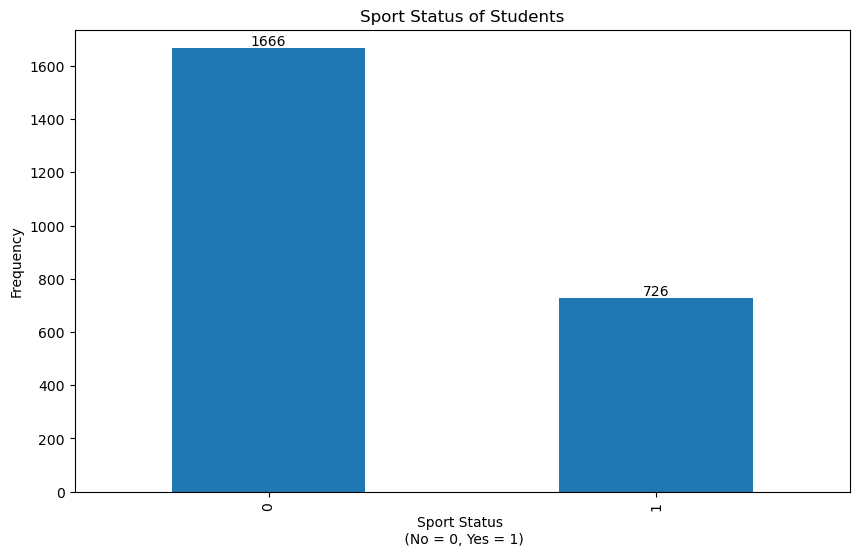

In [ ]:
#Sports
plt.figure(figsize=(10, 6))
count = raw_data_copy['Sports'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Sport Status of Students', 
    xlabel = 'Sport Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1666 students do not do sports (0)*
- *726 students do sports (1)*

*This indicates a significant imbalance between students who participate in sports and those who don't. The lower participation in sports could suggest that students may be prioritizing academics, or it could mean that sports participants have less time for study, which may affect their GradeClass performance either positively (due to structure and discipline) or negatively (due to time constraints).To draw accurate conclusions, it would be beneficial to perform a bivariate analysis comparing Sports participation with GradeClass to observe any clear trends or correlations.*

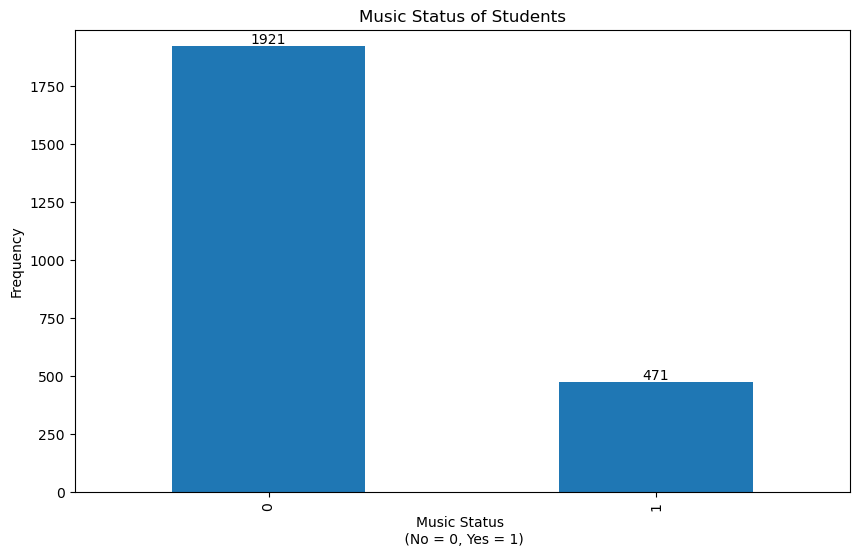

In [ ]:
#Music
plt.figure(figsize=(10, 6))
count = raw_data_copy['Music'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Music Status of Students', 
    xlabel = 'Music Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1921 students do not take music (0)*
- *471 students do take music (1)*

*This represents a large gap between students who take music and those who don't. While the numbers alone don't show causation, it's worth exploring whether music involvement has a positive or negative impact on the GradeClass. Students involved in music might develop discipline and cognitive skills that could enhance performance or if it's time-consuming, it might detract from study time. A bivariate analysis comparing Music and GradeClass would help uncover any meaningful patterns or correlations.*

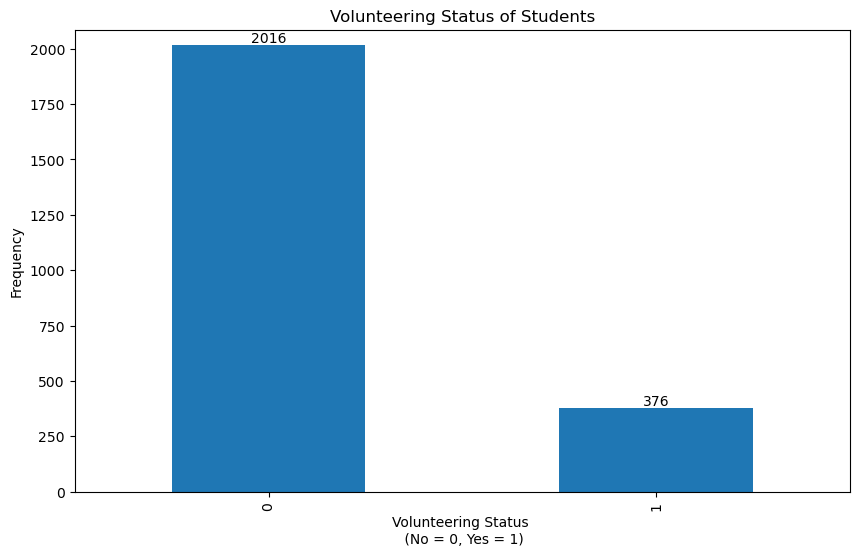

In [ ]:
#Volunteering
plt.figure(figsize=(10, 6))
count = raw_data_copy['Volunteering'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Volunteering Status of Students', 
    xlabel = 'Volunteering Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *2016 students do not volunteer (0)*
- *376 students do volunteer (1)*

*This reflects a substantial difference in participation, with volunteering being relatively uncommon among the student population. The low number of volunteers could imply that those who do volunteer are more motivated, responsible, or time-managed, traits that might positively influence the GradeClass. However, it's also possible that volunteering takes time away from studying, potentially impacting grades negatively for some.
To determine the actual influence, further bivariate analysis between Volunteering and GradeClass is needed to explore potential trends or correlations.*

***Independent (ordinal)***

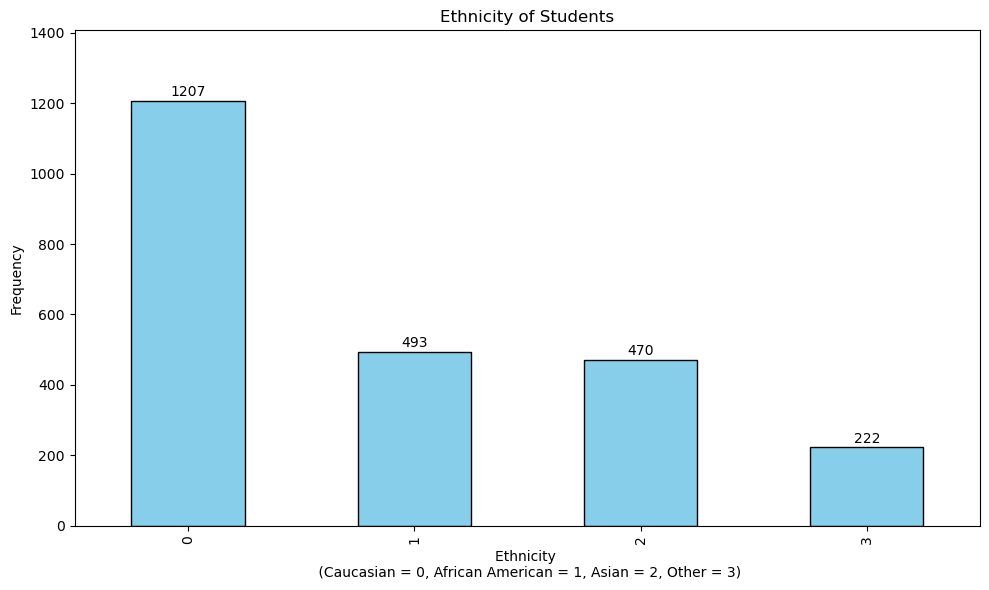

In [ ]:
#Ethnicity
count = raw_data_copy['Ethnicity'].value_counts()

# Plot setup
plt.figure(figsize=(10, 6))
chart = count.plot.bar(
    title='Ethnicity of Students',
    xlabel='Ethnicity \n (Caucasian = 0, African American = 1, Asian = 2, Other = 3)',
    ylabel='Frequency',
    color='skyblue',
    edgecolor='black'
)

for i, v in enumerate(count):
    chart.text(i, v + 5, str(v), ha='center', va='bottom') 
plt.ylim(0, max(count) + 200)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *1207 students are Caucasian (0)*
- *493 students are African American (1)*
- *470 students are Asian (2)*
- *222 students are Other (3)*

*There is a noticeable imbalance in representation across ethnicity groups, with Caucasian students forming the majority. This uneven distribution may lead to limited generalizability when comparing the GradeClass across ethnicities. While ethnicity could potentially influence GPA due to external socio-economic or cultural factors, the current data distribution suggests that its impact may be minimal and to validate this assumption, a bivariate analysis comparing Ethnicity with GradeClass would be useful.*

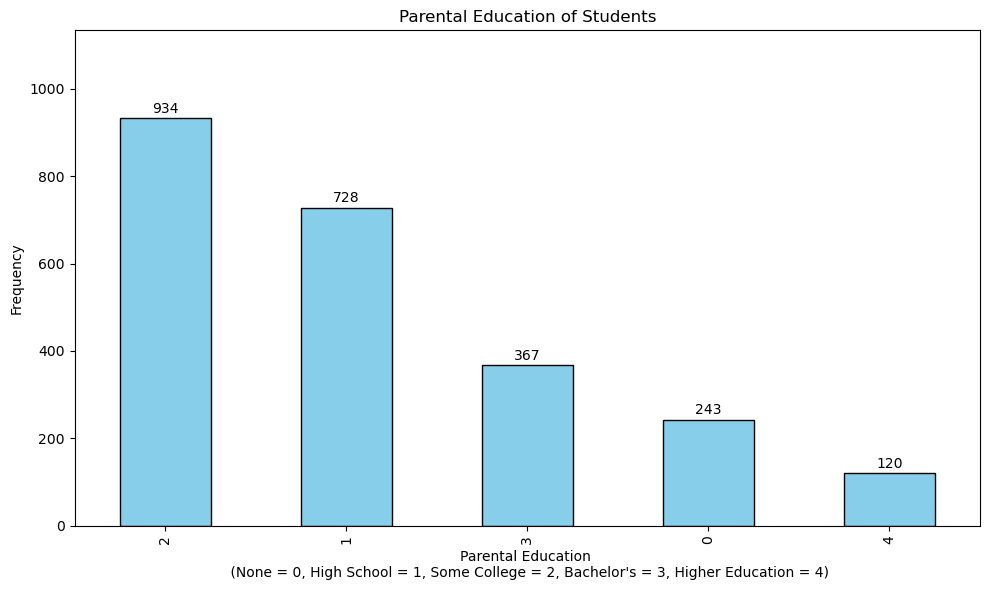

In [ ]:
#ParentalEducation
count = raw_data_copy['ParentalEducation'].value_counts()

# Plot setup
plt.figure(figsize=(10, 6))
chart = count.plot.bar(
    title='Parental Education of Students',
    xlabel="Parental Education \n (None = 0, High School = 1, Some College = 2, Bachelor's = 3, Higher Education = 4)",
    ylabel='Frequency',
    color='skyblue',
    edgecolor='black'
)

for i, v in enumerate(count):
    chart.text(i, v + 5, str(v), ha='center', va='bottom') 
plt.ylim(0, max(count) + 200)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *243 student's parents have no education (0)*
- *728 student's parents have a high school education (1)*
- *934 student's parents have a some college education (2)*
- *367 student's parents have a bachelor's level education (3)*
- *120 student's parents have higher level education (4)*

*The data indicates that most students come from households where parents have at least a high school education. The distribution is skewed towards lower to mid-level educational attainment, with fewer parents having obtained bachelor’s or higher-level degrees. This skewness might suggest that parental education could influence a student’s GradeClass, particularly in households where higher education might contribute to better study environments, guidance, or support. However, the lower representation of higher education levels could limit the predictive power for these categories.
A follow-up bivariate analysis comparing ParentalEducation to GradeClass can help assess the strength and nature of this relationship.*

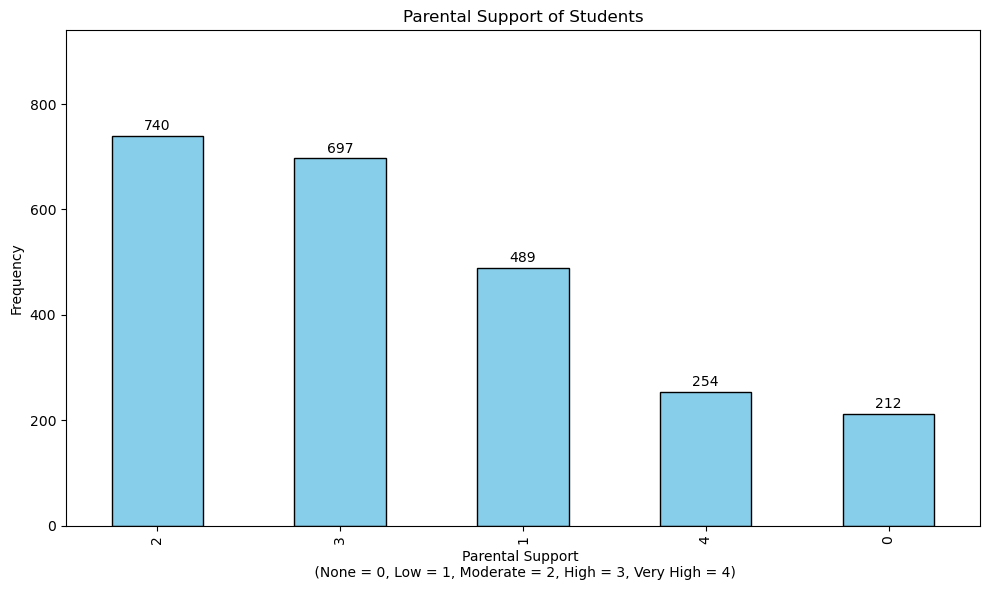

In [ ]:
#ParentalSupport
count = raw_data_copy['ParentalSupport'].value_counts()

# Plot setup
plt.figure(figsize=(10, 6))
chart = count.plot.bar(
    title='Parental Support of Students',
    xlabel="Parental Support \n (None = 0, Low = 1, Moderate = 2, High = 3, Very High = 4)",
    ylabel='Frequency',
    color='skyblue',
    edgecolor='black'
)

for i, v in enumerate(count):
    chart.text(i, v + 5, str(v), ha='center', va='bottom') 
plt.ylim(0, max(count) + 200)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *212 student's parents provide no support (0)*
- *489 student's parents provide low support (1)*
- *740 student's parents provide moderate support (2)*
- *697 student's parents provide high support (3)*
- *254 student's parents provide very high support (4)*

*The distribution is centered around moderate to high levels of support, with relatively fewer students reporting no or very high support. This indicates that most students receive at least some level of parental involvement, which may positively impact academic performance. While the distribution is slightly skewed toward moderate support, the variety across support levels allows room to investigate potential trends or correlations between higher parental support and better GradeClass outcomes. Further bivariate analysis would help determine how strong this relationship is.*

#### ***Dependent (Target) Feature***
*The target feature for this data set is the **GradeClass***

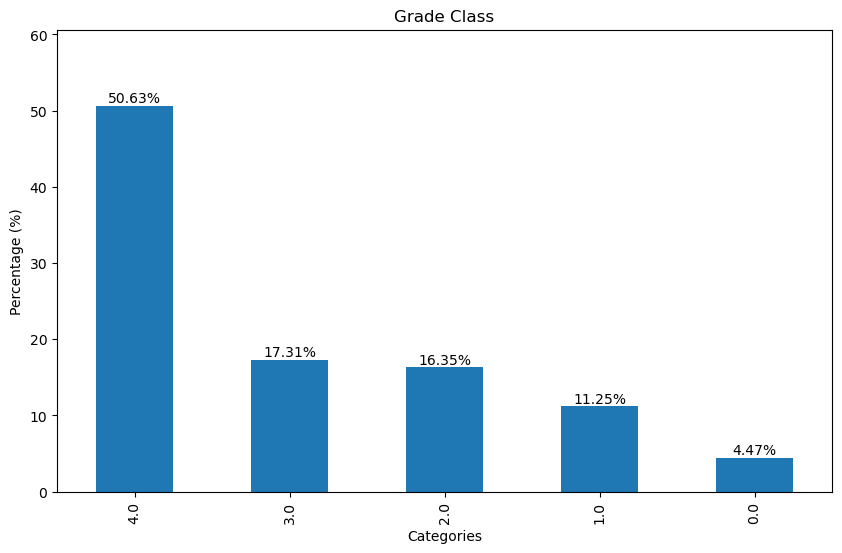

In [ ]:
plt.figure(figsize=(10, 6))
count = raw_data['GradeClass'].value_counts(normalize=True)*100

#Plot bar graph
chart = count.plot.bar(
    title = 'Grade Class', 
    xlabel = 'Categories',
    ylabel = 'Percentage (%)'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, f"{round(v, 2)}%",
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 10)
plt.show()

***Insight Gained***:

*By converting the distibution values to a percentage allows for better insight and readbility of the dataset*

*From the data we can see the GradeClass percentages:*
- *A: 4.47%*
- *B: 11.25%*
- *C: 16.35%*
- *D: 17.31%*
- *F: 50.63%*

*The grade distribution shows that the majority of individuals (50.63%) failed, with a significant portion (17.31%) passing but performing below expectations. A moderate percentage (16.35%) achieved average results, while a smaller group (11.25%) performed well. Only a small fraction (4.47%) reached the highest grade. This suggests that the majority of the students need assistance or support.*

### ***C. Bivariate Analysis***
*Bivariate analysis is the process of analysing two variables together. The data is analysed to find the relationship between the dependent and independent variables.*

*The graphs below will visualise the impact that each independent feature has on the target variable (GradeClass).*

#### ***Numeric Indepenednt Features and Dependent Feature***

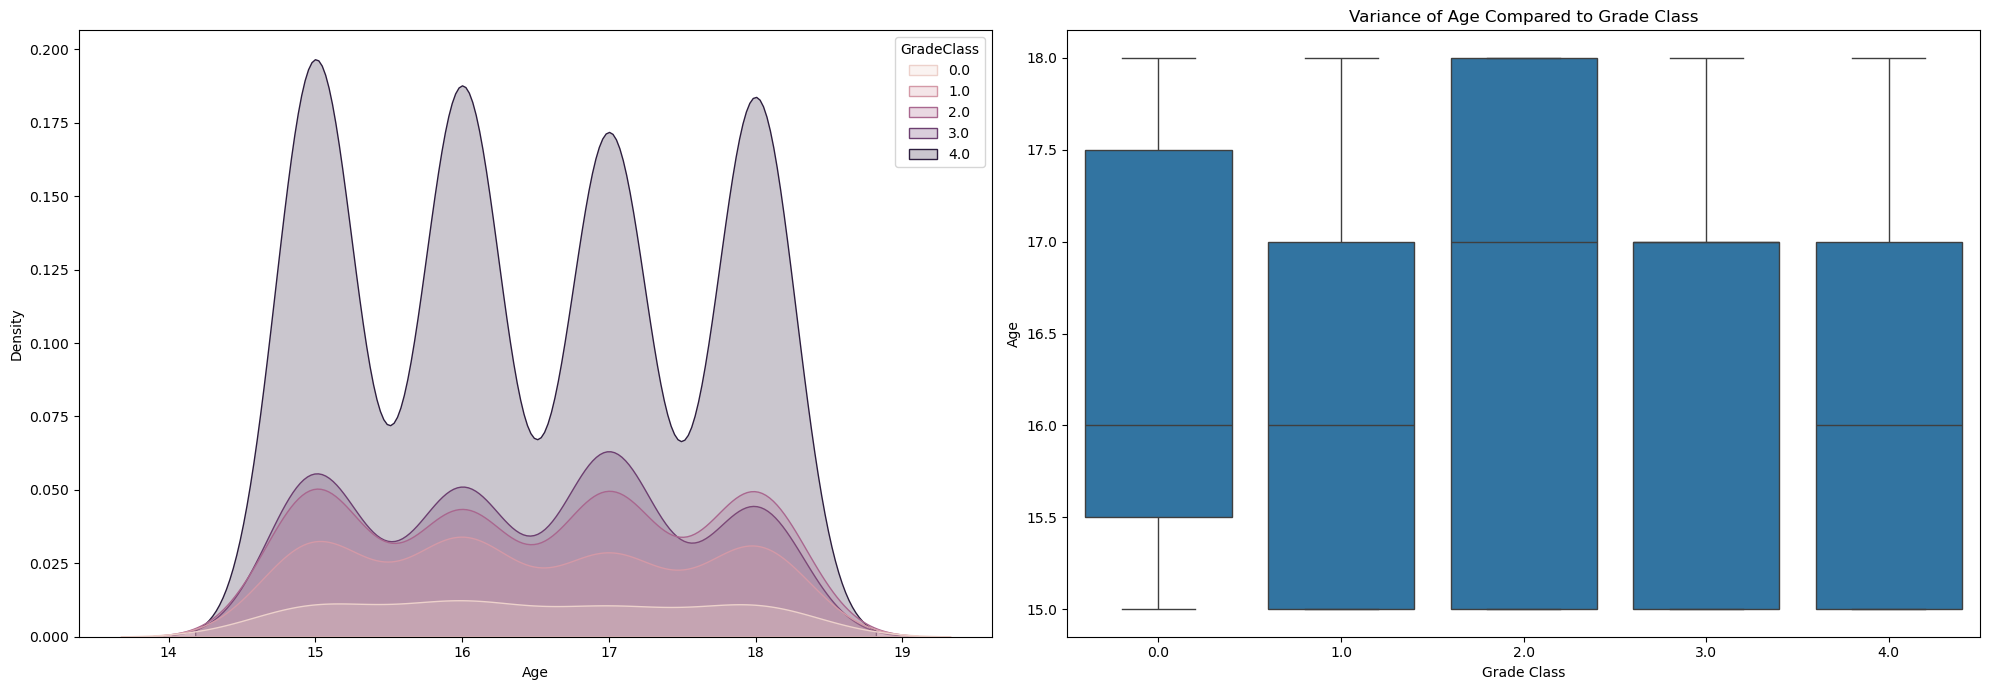

F-statistic: 0.16771783234757068, p-value: 0.9548495077916599


In [ ]:
#Age and GradeClass
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Age']
)
plt.figure(figsize=(20, 7))

plt.subplot(121)  
sns.kdeplot(data=raw_data_copy, x='Age', hue='GradeClass', fill=True)


plt.subplot(122)  
sns.boxplot(x='GradeClass', y='Age', data=raw_data_copy)
plt.title('Variance of Age Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Age')

plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Kernel Density Estimate Plot:***
- *This shows the distribution of ages for each GradeClass.*
- *The age distribution is almost identical across all Grade Classes.*
- *Each GradeClass (from A to F) shows peaks at the same age intervals (15, 16, 17, 18), indicating no significant shift in age across different grades.*
- *This suggests that age is not a strong differentiator for GradeClass in the dataset.*

***Right Plot – Box Plot***
- *This shows summary statistics of age for each GradeClass*
- *Medians are nearly the same across most Grade Classes except C(2) which has the largest spread of ages.*
- *It can also be seen that the higher grade classes (D, F) have smaller variances in the ages.*  
- *No noticeable outliers or extreme variation.*

***This pattern identified:***
- *The box plot shows declining medians.*
- *The strip plot shows denser study clusters at lower grade classes.*
- *The Analysis of Variance (ANOVA) test shows a significant p-value confirming the differences aren’t due to random variation.*

*The F-statistic is very low (0.1677), and the p-value is 0.9548, which is significantly higher than the common significance threshold of 0.05. This suggests that there is no statistically significant relationship between age and Grade Class. Therefore, age does not seem to strongly influence the grade class distribution in this dataset.*

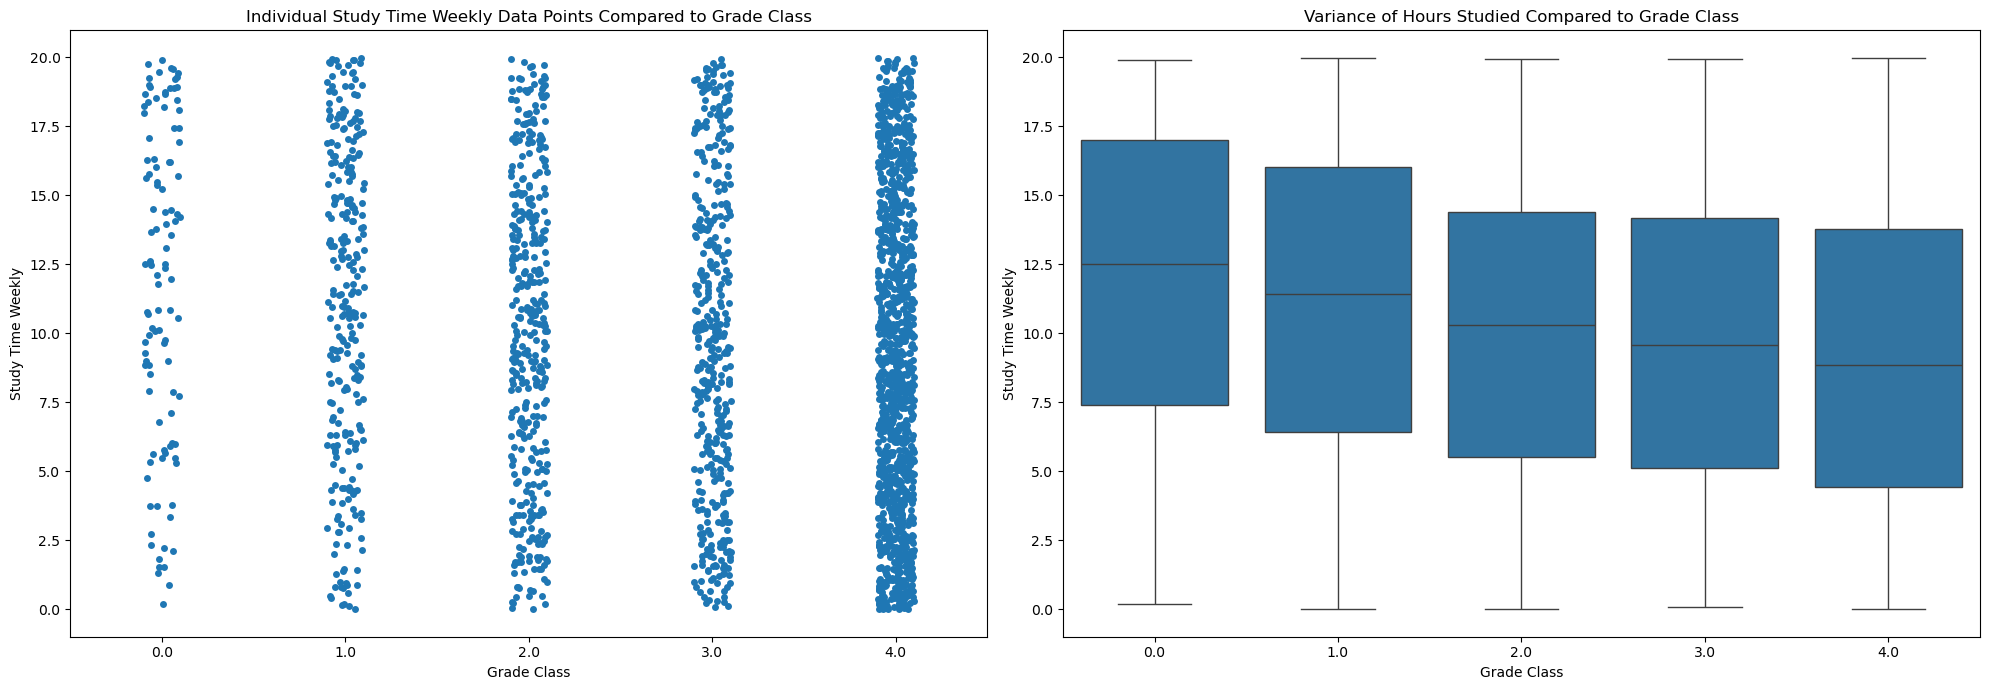

F-statistic: 11.269250054082054, p-value: 4.644425474306781e-09


In [ ]:
#StudyTimeWeekly and GradeClass
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['StudyTimeWeekly']
)
plt.figure(figsize=(20, 7))

plt.subplot(121)  
sns.stripplot(x='GradeClass', y='StudyTimeWeekly', data=raw_data_copy, jitter=True)
plt.title('Individual Study Time Weekly Data Points Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Study Time Weekly')

plt.subplot(122)  
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=raw_data_copy)
plt.title('Variance of Hours Studied Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Study Time Weekly')

plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Strip Plot:***
- *Shows individual data points of weekly study time for each GradeClass.*
- *Shows variability in how much students study within each class.*
- *Some grade classes A(0) and B(1) have more spread*

***Right Plot – Box Plot***
- *Displays median, interquartile range (IQR), and outliers of study times for each grade class.*
- *Shows:*
    - *Median study time decreases slightly from GradeClass A(0) to GradeClass F(4).*
    - *GradeClass A(0) and B(1) have higher medians and slightly wider IQRs.*
    - *GradeClass F(4) appears to have the lowest median and is more tightly packed.*

***This pattern identified:***
- *The box plot shows declining medians.*
- *The strip plot shows denser study clusters at lower grade classes.*
- *The Analysis of Variance (ANOVA) test shows a significant p-value confirming the differences aren’t due to random variation.*

*The F-statistic is quite high (11.27), and the p-value is extremely low (4.64e-09), which is far below the common significance threshold of 0.05. This indicates that there is a statistically significant relationship between Study Time Weekly and Grade Class. Therefore, the amount of time students study each week appears to have a strong influence on their grade class in this dataset.*

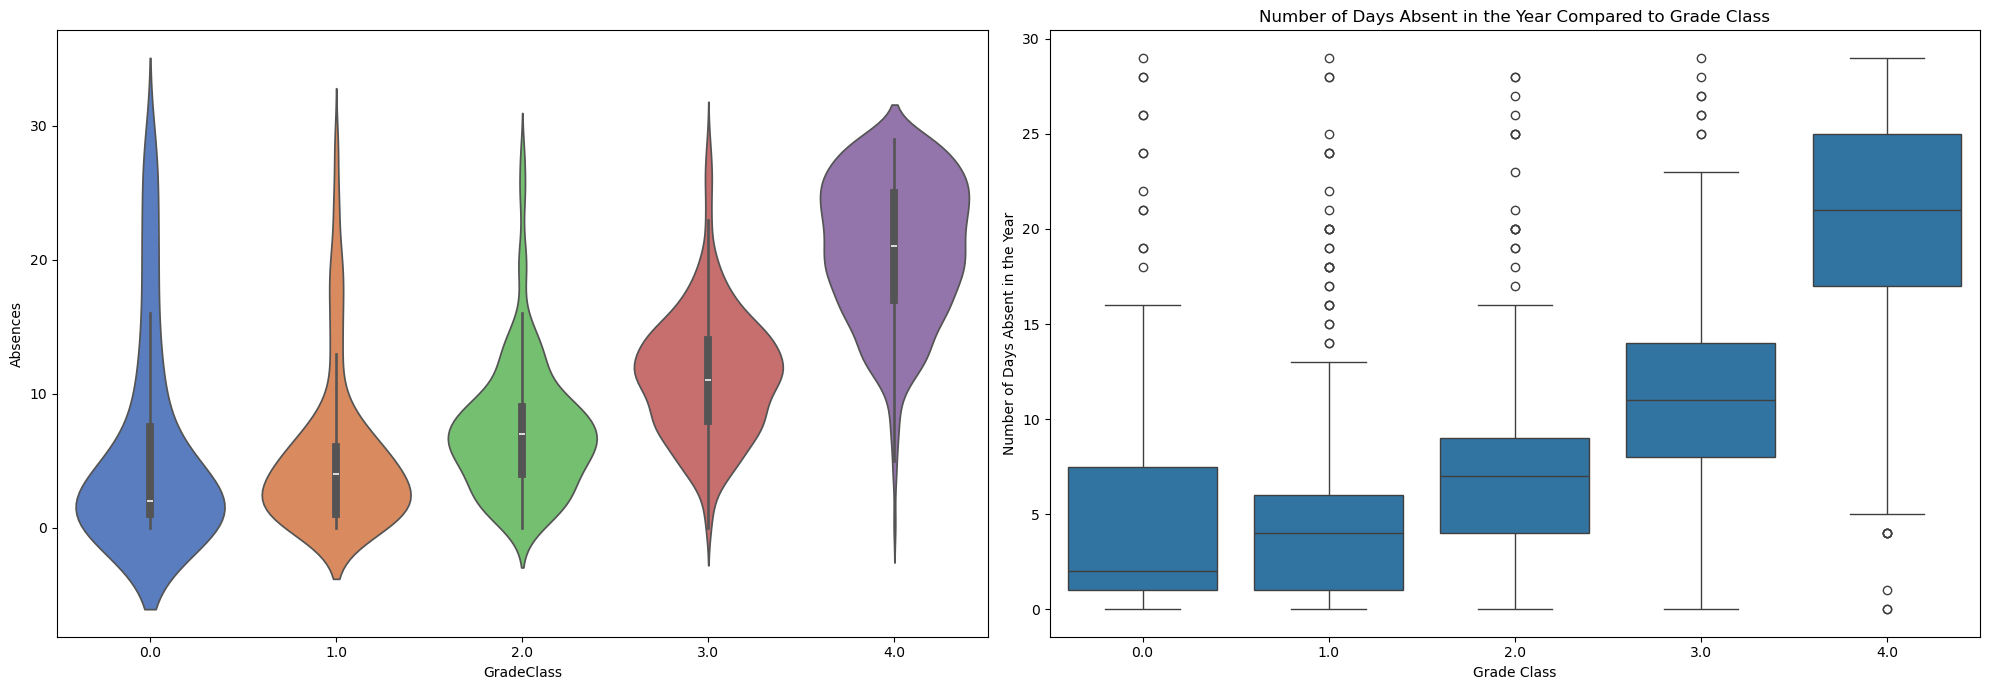

F-statistic: 903.1176108419992, p-value: 0.0


In [ ]:
#Absence and GradeClass
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Absences']
)
plt.figure(figsize=(20, 7))

plt.subplot(121)  
sns.violinplot(x='GradeClass', y='Absences', data=raw_data_copy, palette='muted')

plt.subplot(122)  
sns.boxplot(x='GradeClass', y='Absences', data=raw_data_copy)
plt.title('Number of Days Absent in the Year Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Number of Days Absent in the Year')

plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Violin Plot:***
- *The distribution of absences becomes wider and shifts higher as we move from GradeClass A (0) to GradeClass F (4).*
- *Students in GradeClass A and B have fewer absences, with their data tightly concentrated around the lower end of the scale.*
- *In contrast, students in lower grade classes (D and F) tend to have more absences, and their distributions are broader and more spread out.*
- *This visual trend suggests a positive correlation between the number of absences and poorer academic performance.*

***Right Plot – Box Plot***
- *We observe an upward trend in the median number of absences as GradeClass worsens (from A to F).*
- *The interquartile ranges (IQRs) also widen, especially for GradeClass D(3) and F(4), indicating greater variation in absences for students with lower grades.*
- *There are more outliers in higher GradeClasses, but the central tendency still reflects a clear trend: more absences are associated with worse grades.*

***This pattern identified:***
- *The box plot shows rising medians from GradeClass A to F.*
- *The violin plot highlights increasing density of high-absence students in lower grade classes.*
- *The ANOVA test provides strong statistical support for this observation.*

*A high F-statistic and a p-value of 0.0 confirms that the differences in absences across GradeClasses are statistically significant and not due to random variation. Therefore, the amount of days absent each year appears to have a strong influence on a students grade class.*

#### ***Binary Indepenednt Features and Dependent Feature***

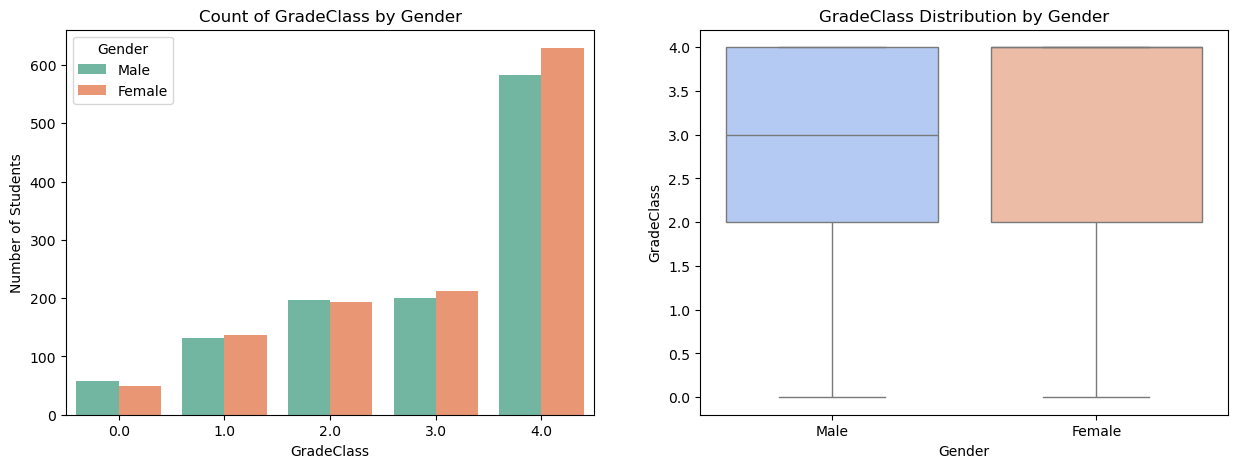

F-statistic: 0.4782252195363547, p-value: 0.7517683058272329


In [ ]:
#Gender
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Gender']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Gender', palette='Set2')
plt.title('Count of GradeClass by Gender')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Gender', labels=['Male', 'Female'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Gender', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('GradeClass Distribution by Gender')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Both male and female students are represented across all GradeClasses, but the number of students increases steadily as GradeClass declines from A(0) to F(4).*
- *Female students slightly outnumber males in most GradeClasses, particularly in the lowest performing category, GradeClass F(4).*
- *This suggests that while gender distribution is fairly even, more females are ending up in lower grade classes than males.*

***Right Plot – Box Plot***
- *GPA distributions for male and female students are similar.*
- *The median GPA for both genders is nearly identical, suggesting that gender alone may not be a strong predictor of GradeClass.*
- *There’s slightly more variability in male GPA, but both genders show comparable interquartile ranges and outliers.*

***This pattern identified:***
- *The count plot shows that while gender participation is fairly balanced, slightly more female students fall into lower grade categories.*
- *The box plot does not indicate any strong differences in GradeClass between males and females.*
- *This may suggest that gender, as an independent feature, does not have a strong impact on GradeClass but may slightly affect grade classification outcomes.*

*A low F-statistic and a high p-value indicate that the differences in GradeClass across genders are not statistically significant. Therefore, gender does not appear to have a meaningful influence on GradeClass. Any observed differences are likely due to random variation.*

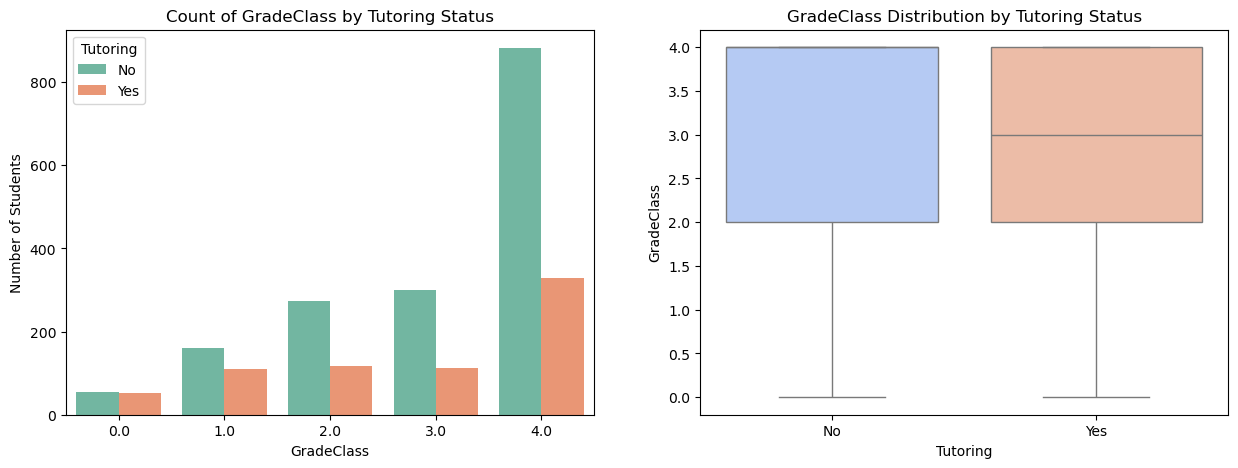

F-statistic: 9.569208148206243, p-value: 1.1263954988041777e-07


In [ ]:
#Tutoring
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Tutoring']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Tutoring', palette='Set2')
plt.title('Count of GradeClass by Tutoring Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Tutoring', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Tutoring', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Tutoring Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *There are significantly more students without tutoring in the lowest GradeClass F(4), compared to those receiving tutoring.*
- *Tutored students are more evenly spread across the GradeClasses, with notably fewer in the lowest GradeClass.*
- *This pattern suggests that students who receive tutoring are less likely to fall into the lowest grade group, indicating a potential academic benefit.*

***Right Plot – Box Plot***
- *The median GradeClass for tutored students is lower compared to non-tutored students.*
- *Non-tutored students show a wider spread toward poorer grades, while tutored students tend to cluster closer to the better GradeClasses.*
- *This visual evidence supports the idea that tutoring has a positive effect on academic outcomes.*

***This pattern identified:***
- *The count plot reveals that students who don’t receive tutoring fall mostly into the failing grade group.*
- *The box plot highlights a clear improvement in GradeClass distribution for students who receive tutoring.*
- *The ANOVA test provides strong statistical evidence to support the visual trend.*

*A high F-statistic and an extremely low p-value confirm that the differences in GradeClass between tutored and non-tutored students are statistically significant. Therefore, receiving tutoring appears to have a strong and positive influence on student academic performance in this dataset.*

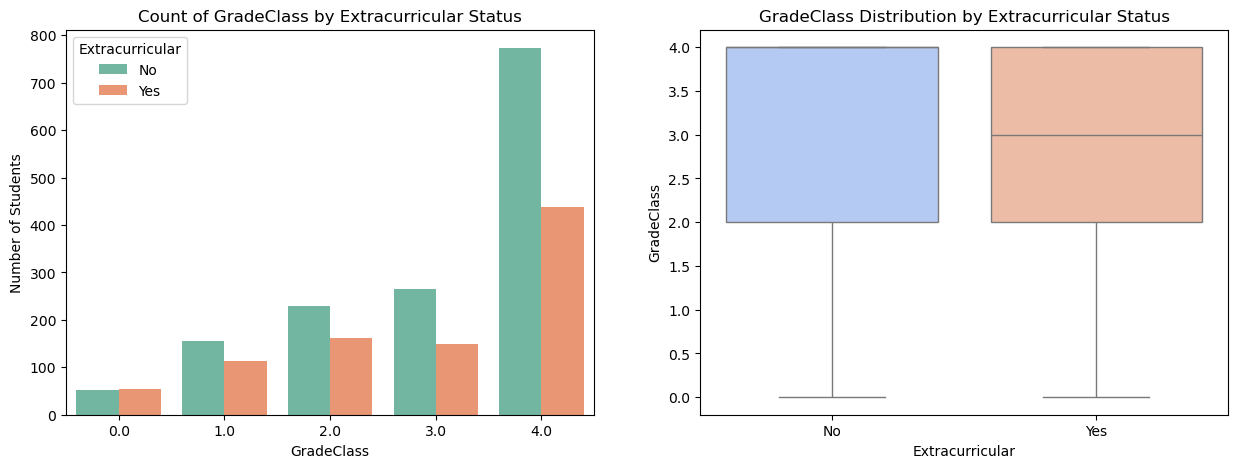

F-statistic: 3.568045637427275, p-value: 0.006579747194651358


In [ ]:
#Extracurricular
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Extracurricular']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Extracurricular', palette='Set2')
plt.title('Count of GradeClass by Extracurricular Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Extracurricular', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Extracurricular', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Extracurricular Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students not involved in extracurricular activities are more heavily represented in the lowest GradeClass F(4).*
- *Those participating in extracurricular activities are more evenly distributed across the GradeClasses, with a noticeably smaller group falling into the failing category.*
- *This trend suggests that involvement in extracurricular activities may be associated with a better GradeClass.*

***Right Plot – Box Plot***
- *Students involved in extracurricular activities tend to have a lower median GradeClass compared to those who are not.*
- *The distribution of GradeClasses for students without extracurricular involvement skews more heavily toward poorer grades.*
- *This difference indicates a potential positive impact of extracurricular participation on student performance.*

***This pattern identified:***
- *The count plot shows that non-participating students dominate the failing group (GradeClass 4).*
- *The box plot supports this by showing a lower central tendency for students in extracurriculars.*
- *The ANOVA test provides statistically significant evidence supporting the visual patterns.*

*A relatively high F-statistic and a p-value below 0.01 confirm that the differences in GradeClass between students who participate in extracurricular activities and those who don’t are statistically significant. Thus, participating in extracurricular activities appears to contribute positively to academic performance.*

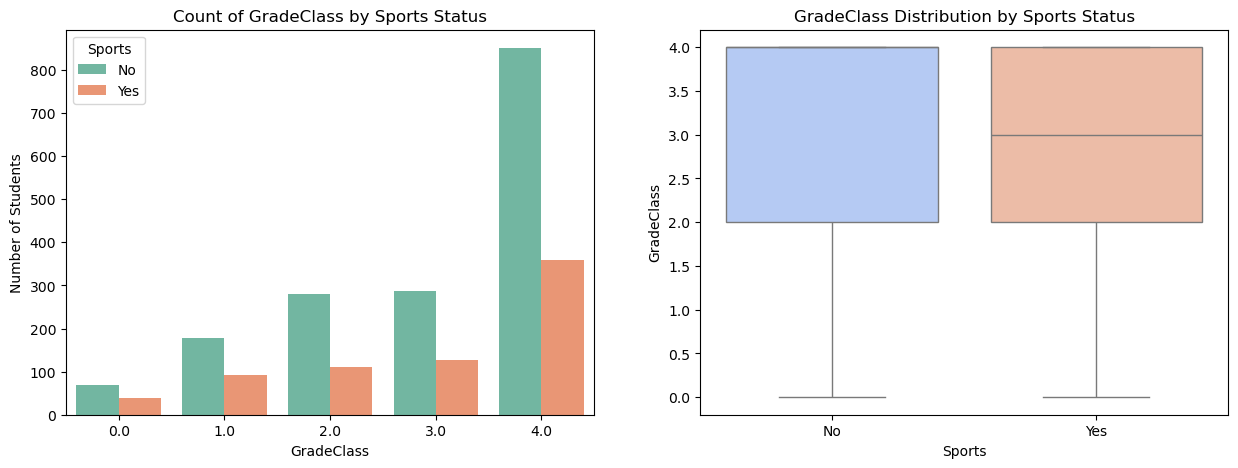

F-statistic: 1.0920203610875618, p-value: 0.3587435557256194


In [ ]:
#Sports
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Sports']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Sports', palette='Set2')
plt.title('Count of GradeClass by Sports Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Sports', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Sports', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Sports Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students who do not participate in sports activities are more prevalent in the lowest GradeClass F(4).*
- *Those who do participate in sports are slightly better distributed but still form a substantial portion of the failing group.*
- *Unlike with extracurricular activities, the trend is not as strongly in favor of better performance for sports participants.*

***Right Plot – Box Plot***
- *Both groups have a similar median GradeClass (around 3).*
- *The distribution shape and range also appear nearly identical, suggesting that sports involvement alone may not strongly influence academic performance.*


***This pattern identified:***
- *The visual evidence shows minimal difference between the two groups.*
- *The ANOVA test supports this, showing low statistical significance.*

*A low F-statistic and a p-value well above 0.05 indicate that the difference in GradeClass between students who play sports and those who don’t is not statistically significant. Therefore, participation in sports does not appear to have a strong or consistent impact on academic performance in this dataset.*

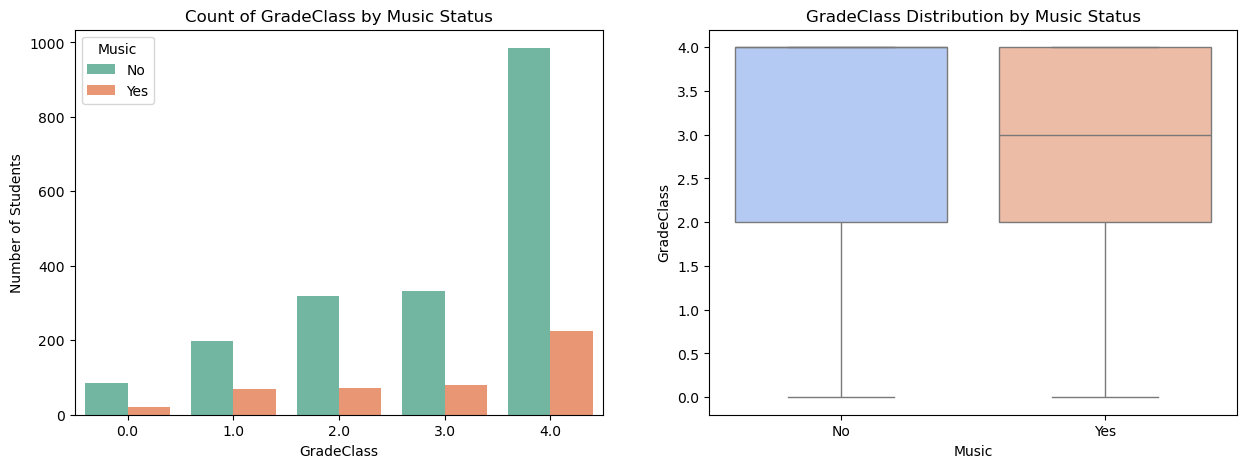

F-statistic: 1.9752596781855536, p-value: 0.09564237978404323


In [ ]:
#Music
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Music']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Music', palette='Set2')
plt.title('Count of GradeClass by Music Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Music', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Music', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Music Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students who do not participate in music activities are more prevalent in the lowest GradeClass F(4).*
- *Those who do participate in music are slightly better distributed but still form a substantial portion of the failing group.*
- *Unlike with extracurricular activities, the trend is not as strongly in favor of better performance for music participants.*

***Right Plot – Box Plot***
- *Both groups have a similar median GradeClass (around 3).*
- *The distribution shape and range also appear nearly identical, suggesting that music involvement alone may not strongly influence academic performance.*

***This pattern identified:***
- *The visual evidence shows minimal difference between the two groups.*
- *The ANOVA test supports this, showing low statistical significance.*

*A moderate F-statistic and a p-value slightly above the 0.05 threshold suggest that there may be some differences in GradeClass between the groups, but these differences are not statistically significant. This implies that any variations in GradeClass are likely due to random chance rather than a true effect of the variable being tested.*

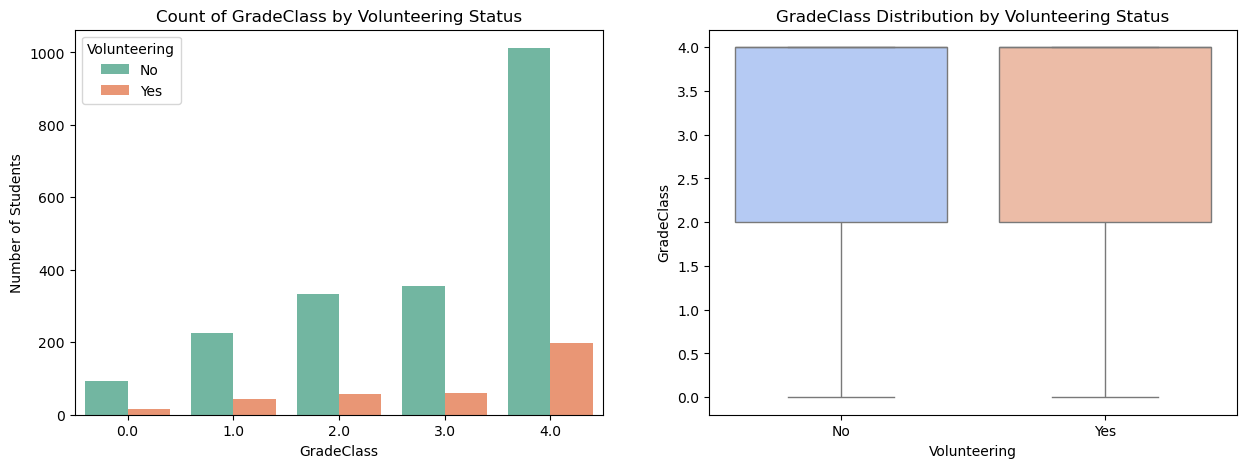

F-statistic: 0.37017935314424244, p-value: 0.8300231510368


In [ ]:
#Volunteering
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Volunteering']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Volunteering', palette='Set2')
plt.title('Count of GradeClass by Volunteering Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Volunteering', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Volunteering', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Volunteering Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students who do not volunteer are more prevalent in the lowest GradeClass F(4).*
- *Those who do volunteer are slightly better distributed but still form a substantial portion of the failing group.*
- *Unlike with extracurricular activities, the trend is not as strongly in favor of better performance for those that volunteer.*

***Right Plot – Box Plot***
- *Both groups have a similar median GradeClass (around 3).*
- *The distribution shape and range also appear nearly identical, suggesting that volunteering alone may not strongly influence academic performance.*


***This pattern identified:***
- *The visual evidence shows minimal difference between the two groups.*
- *The ANOVA test supports this, showing low statistical significance.*

*A low F-statistic and a high p-value of 0.83 indicate that the differences in GradeClass across groups are not statistically significant and are likely due to random variation. Therefore, volunteering does not appear to have a meaningful influence on a student's grade class.*

#### ***Ordinal Indepenednt Features and Dependent Feature***

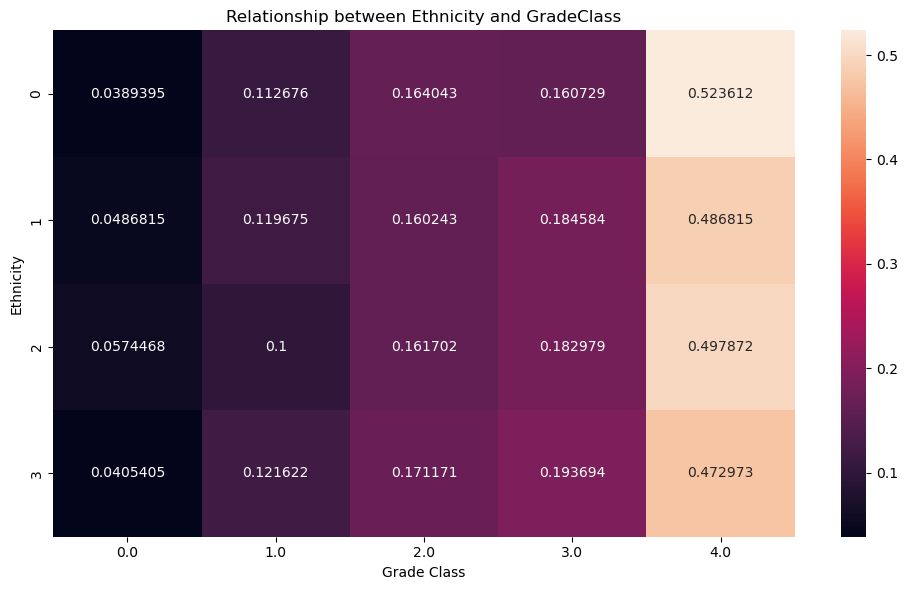

F-statistic: 1.0560734337522977, p-value: 0.3767524310351785


In [ ]:
#Ethnicity
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Ethnicity']
)

crosstab = pd.crosstab(raw_data_copy['Ethnicity'], raw_data_copy['GradeClass'])

#Normalise due to group size differences
crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g') 
plt.title('Relationship between Ethnicity and GradeClass')
plt.xlabel('Grade Class')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

*The data was normalised to take into consideration the large difference in the number of students of each Ethnicity to prevent bias towards the larger groups.*

***Heatmap - Count Plot:***
- *The heatmap shows the proportional distribution of students from each ethnicity group across GradeClasses.*
- *All ethnic groups have the highest proportion of students in GradeClass F (4), with values hovering around 0.47 to 0.52.*
- *The distribution across other GradeClasses is relatively uniform with minor differences between ethnicities.*
- *There are no dramatic variations in how GradeClasses are distributed across different ethnic groups.*


***This pattern identified:***
- *Each ethnic group’s heatmap row shows a very similar pattern, indicating consistency in grade distributions across ethnicities.*
- *No single ethnicity stands out as performing significantly better or worse than others.*
- *The consistent shading across ethnicities and GradeClasses visually supports the absence of any strong group-based academic disparity.*

*A low F-statistic and a high p-value of 0.38 indicate that the differences in GradeClass across Ethnicity groups are not statistically significant and may be due to random variation. Therefore, Ethnicity does not appear to have a strong influence on a student's grade class.*

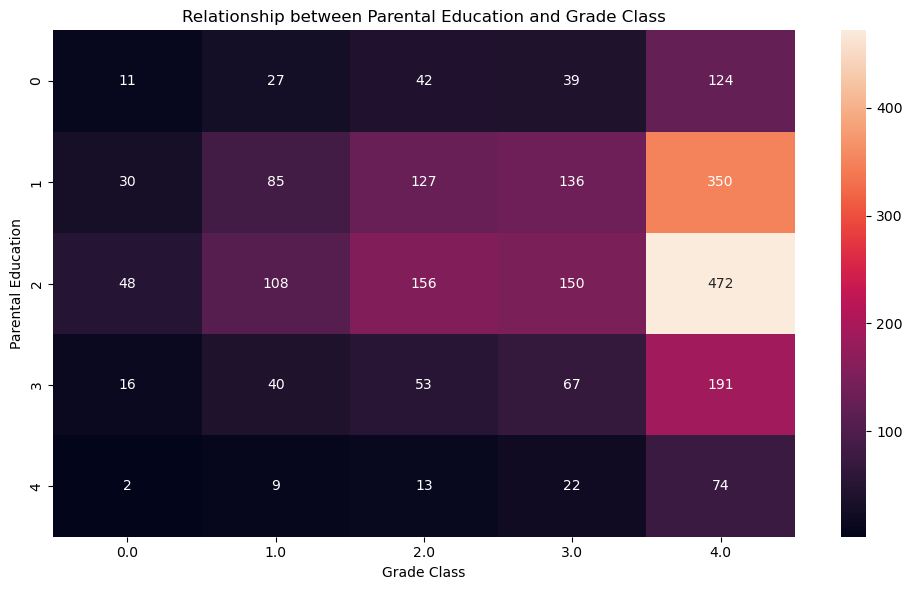

F-statistic: 1.3767088184422958, p-value: 0.23948379263133682


In [ ]:
#ParentalEducation
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['ParentalEducation']
)

crosstab = pd.crosstab(raw_data_copy['ParentalEducation'], raw_data_copy['GradeClass'])

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g') 
plt.title('Relationship between Parental Education and Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Parental Education')
plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Heatmap - Count Plot:***
- *The heatmap visualizes the count of students across different levels of parental education and their corresponding GradeClasses.*
- *A higher concentration of students is seen in GradeClass F (4) across all parental education levels.*
- *Parental education level 2 shows the highest overall count across all grade classes, especially in GradeClass F (472 students), followed by level 1 (350 students).*
- *The lowest number of students are from parental education level 4, yet most of them still fall into the lowest GradeClass.*
- *There is no consistent trend where higher parental education is associated with better grade performance.*

***This pattern identified:***
- *Despite slight variations in student counts, GradeClass F consistently has the highest number of students regardless of parental education.*
- *The distribution across GradeClasses appears relatively similar across different parental education levels.*
- *The heatmap does not provide strong visual evidence that higher parental education significantly improves student academic outcomes.*

*A moderate F-statistic and a relatively high p-value of 0.239 suggest that differences in GradeClass across varying parental education levels are not statistically significant. Thus, parental education does not appear to have a strong, direct influence on a student's grade class.*

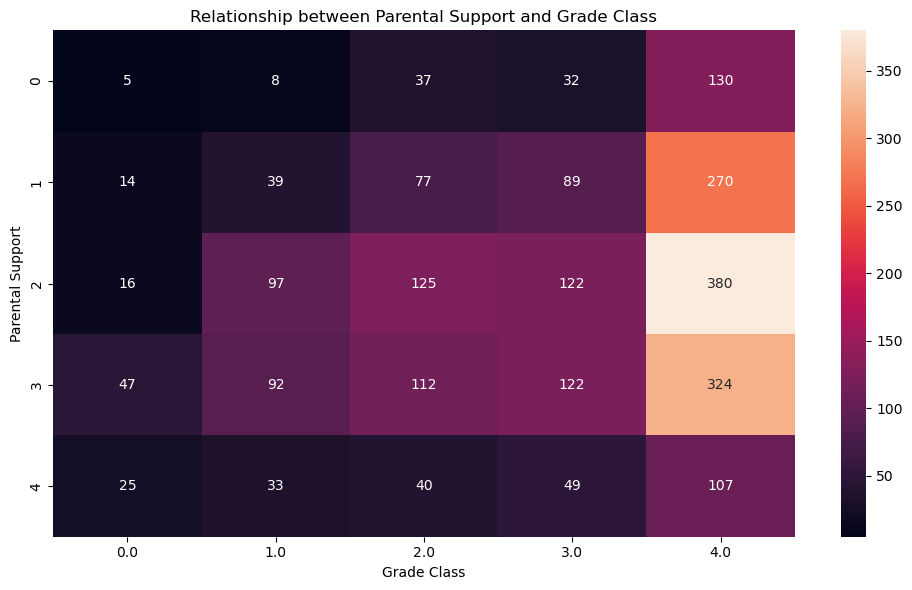

F-statistic: 13.936767875288535, p-value: 3.052782106028322e-11


In [ ]:
#ParentalSupport
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['ParentalSupport']
)

crosstab = pd.crosstab(raw_data_copy['ParentalSupport'], raw_data_copy['GradeClass'])

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g') 
plt.title('Relationship between Parental Support and Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Parental Support')
plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Heatmap - Count Plot:***
- *The heatmap illustrates the relationship between levels of parental support and student GradeClass outcomes.*
- *There is a strong concentration of students in GradeClass F (4) across all levels of parental support, particularly at support level 2 (380 students) and 3 (324 students).*
- *As parental support increases from 0 to 3, the number of students in higher grade classes (B to D) also rises, suggesting some benefit to moderate support levels.*
- *However, even at the highest support level (4), most students still fall into the lowest grade class (F), implying diminishing returns at extreme levels or potential data imbalance.*


***This pattern identified:***
- *Parental support levels 2 and 3 have the highest student representation overall and across all GradeClasses.*
- *While GradeClass F dominates across the board, there is a noticeable upward distribution in better grades (GradeClass B to D) as support increases from 0 to 3.*
- *Parental support appears to influence academic performance to some extent, especially in the mid-range support levels.*

*A high F-statistic of 13.94 and a near-zero p-value (3.05e-11) confirm that the differences in GradeClass across varying levels of parental support are statistically significant. Therefore, parental support has a meaningful influence on student grade outcomes.*

## ***4. Hypothesis***

Students with a higher absenteeism rate are predicted to fall into lower grade classes compared to students with fewer absences. We hypothesize that as the number of absences increases, the likelihood of a student being placed in a lower grade class also increases. However, students who dedicate more time to studying each week are more likely to be classified into higher grade classes, even if their absenteeism is relatively high.

Furthermore, we predict that students who receive parental support and tutoring are more likely to be placed in higher grade classes, regardless of their absenteeism rate. This suggests that such support mechanisms can mitigate the negative impact of absenteeism on a student’s academic performance.

Additionally, students who participate in extracurricular activities, such as sports, music, and volunteering, are likely to show improved academic outcomes due to increased engagement and discipline, which can contribute to overall academic success. However, we expect the effect of these activities to be secondary to academic support systems such as tutoring and parental involvement.

We also hypothesize that parental education level may positively correlate with a student’s performance, as more educated parents may provide better academic guidance and learning environments. Gender, age, and ethnicity are expected to have a minor influence, as they are less directly tied to academic behaviors or support structures and are often more reflective of systemic or contextual factors rather than academic effort or intervention.

By evaluating the feature importance scores across models:

Tutoring emerges as the most influential factor in the Logistic Regression model, while it plays a smaller role in Random Forest and XGBoost.

Absences consistently appear as a key feature in all three models, especially in Random Forest and XGBoost, confirming its strong negative impact on student performance.

Study Time Weekly is moderately important, particularly in Random Forest and XGBoost, indicating that consistent study habits contribute meaningfully to academic classification.

Parental Support holds a moderate yet consistent level of importance across models, reinforcing its buffering effect against academic decline.

In contrast, features such as age, ethnicity, and gender show consistently low importance scores across all models, suggesting they have the least direct influence on grade classification.

Final Prediction:
We hypothesize that absenteeism will have the greatest negative influence, while tutoring will have the greatest positive influence on student academic classification. Meanwhile, age and ethnicity are expected to have the least impact on the model's predictions.

## ***5. Data Cleaning***

#### ***A. Identify and Handle Missing Values***

In [ ]:
#Calculates what percentage of the total enteries have missing values
missing_values = (
    raw_data_copy.isnull().sum()/len(raw_data_copy)*100
).astype(int)

#Title and underline
print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)

missing_values

Column			% missing
-----------------------------------


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int32

*There are no missing values*

#### ***B. Identify and Removing Duplicate Data***

In [ ]:
#Check duplicated values
raw_data_copy.duplicated().value_counts()

False    2392
Name: count, dtype: int64

*There are no duplicate entries*

#### ***C. Data Type Conversion***

In [ ]:
#Converts the GradeClass values into integres to better represent category values (A = 0, B=1, C=2, D=3, F=4)
raw_data['GradeClass'] = raw_data['GradeClass'].astype(int)
raw_data[['GradeClass']].head()

,GradeClass
0,2
1,1
2,4
3,3
4,4


#### ***D. Outlier Value Handling***

*During the data analysis section outliers were identified in the bivariate analysis of days absent in realtion to the grade class.*

*Below is the barplots that show the outliers identified*

Text(0, 0.5, 'Number of Days Absent in the Year')

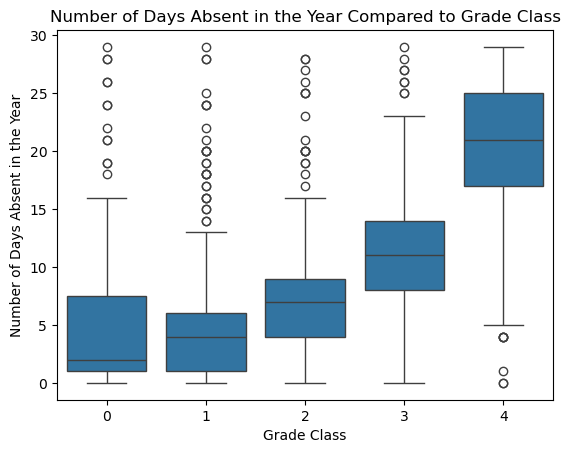

In [ ]:
sns.boxplot(x='GradeClass', y='Absences', data=raw_data_copy)
plt.title('Number of Days Absent in the Year Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Number of Days Absent in the Year')

***Context***

*Individually, absences appear normally distributed and balanced (no strong skew or outliers).*

*But when related to GradeClass, a clear pattern emerges:*
- *More absences = worse performance.*
- *Strong ANOVA evidence backs this up.*
- *Outliers emerge in context — they weren’t outliers in isolation but become so within specific GradeClasses.*

***Keeping the outliers***

*It was decided to keep these outliers for the following reasons:*
- *They may hold valuable insights, especially since they only appear as outliers in relation to the target, not on their own.*
- *Removing them too early could bias the dataset, leading to unrealistic or less generalizable models.*
- *They help test model robustness, showing how well the model handles edge cases and real-world variability.*
- *The can also be remove or adjust later, after evaluating their actual impact on model performance.*

#### ***E. Remove Irrelavent Features***

In [ ]:
#Drop irrelavent features (StudentID)
raw_data_copy = raw_data_copy.drop(columns=['StudentID'], inplace=False)

#Check dimensions
print(f'The data has {raw_data_copy.shape[0]} rows and {raw_data_copy.shape[1]} columns')
raw_data_copy.head()

The data has 2392 rows and 14 columns


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [ ]:
#Drop Direct features (GPA)
raw_data_copy = raw_data_copy.drop(columns=['GPA'], inplace=False)

#Check dimensions
print(f'The data has {raw_data_copy.shape[0]} rows and {raw_data_copy.shape[1]} columns')
raw_data_copy.head()

The data has 2392 rows and 13 columns


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4


***GPA was removed becuase it has a direct effect on predicting GradeClass. This will force the model to learn the relationships between other features like study habits, parental support and extracurricular activities have on GradeClass outcome, without directly using GPA as a predictor.***

## ***4. Split Data***

In [ ]:
raw_data_copy = raw_data_copy.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target
X = raw_data_copy.drop('GradeClass', axis=1)
y = raw_data_copy['GradeClass']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Save to files
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

print(f"Total rows: {len(raw_data_copy)}")
print(f"Train: {len(train_data)} rows")
print(f"Test: {len(test_data)} rows")
print("Saved as 'train.csv' and 'test.csv'")

Total rows: 2392
Train: 1913 rows
Test: 479 rows
Saved as 'train.csv' and 'test.csv'


*This code shuffles a dataset of 2392 rows (raw_data_copy), splits it into 80% training (1913 rows) and 20% testing (479 rows) sets, saves them as train.csv and test.csv, and prints the row counts. The split is done manually using iloc after shuffling with a fixed random_state for reproducibility. While functional, the approach lacks advanced splitting features (e.g., stratification) and a validation set, which might be needed for robust model training.*

##### ***Load the Training and Testing Datasets***

In [ ]:
# ----------------------------------------
# Load the training and testing datasets
# ----------------------------------------
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

target_column = 'GradeClass' 

X_train_LR = train.drop(columns=[target_column])
y_train_LR = train[target_column]

X_test_LR = test.drop(columns=[target_column])
y_test_LR = test[target_column]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_LR)
X_test_scaled = scaler.transform(X_test_LR)

## ***5. Model 1***

#### ***A. Build the Model***

##### ***Multinominal Logistic Regression***

In [ ]:
# ----------------------------------------
# Build the Logistic Regression model
# ----------------------------------------
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train_LR)

LogisticRegression(random_state=42)

##### ***Random Forest***

In [ ]:
# ----------------------------------------
# Build the Random Forest model
# ----------------------------------------
# Initialize and train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_LR, y_train_LR)

RandomForestClassifier(random_state=42)

 ***XGBoost***

In [ ]:
# ----------------------------------------
# Build the XGBoost model
# ----------------------------------------
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_LR, y_train_LR)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#### ***B. Predictions of the Model***

##### ***Multinominal Logistic Regression Predictions***

In [ ]:
# ----------------------------------------------------
# Make predictions using the Logistic Regression model
# ----------------------------------------------------
y_pred_lr = model_lr.predict(X_test_scaled)

# Create a comparison DataFrame for Logistic Regression
LR_comparison_df = pd.DataFrame({
    'Actual': y_test_LR,
    'Predicted': y_pred_lr
})

print(LR_comparison_df.head(10))

   Actual  Predicted
0       4          4
1       4          4
2       4          4
3       4          4
4       2          3
5       3          3
6       2          1
7       4          4
8       4          4
9       3          2


*The model correctly predicts the GradeClass in most cases, showing strong performance overall. However, there are a few misclassifications that indicate areas for improvement.*

***Examples of misclassifications:***

- *Actual GradeClass 3 was predicted as 2.*
- *Actual GradeClass 2 was predicted as 3.*
- *Actual GradeClass 2 was predicted as 1.*

*These examples highlight that the model occasionally confuses neighboring classes, which may suggest class similarity or insufficient feature separation. Further model tuning or feature engineering could help reduce such errors.*

***Random Forest Predictions***

In [ ]:
# -----------------------------------------------
# Make predictions using the Random Forest model
# -----------------------------------------------
y_pred_rf = model_rf.predict(X_test_LR)

RF_comparison_df = pd.DataFrame({
    'Actual': y_test_LR,
    'Predicted': y_pred_rf  
})
print(RF_comparison_df.head(10))

   Actual  Predicted
0       4          4
1       4          4
2       4          4
3       4          4
4       2          3
5       3          3
6       2          3
7       4          4
8       4          4
9       3          2


***Examples of misclassifications:***

- *Actual GradeClass 3 was predicted as 2.*
- *Actual GradeClass 2 was predicted as 3.*

*Most predictions are accurate, which suggests the model is performing well overall.*
*The misclassification of GradeClass 3 as GradeClass 2 indicates that the model may have trouble distinguishing between these two classes in some instances. This could be due to similarities in the features between these classes.*

##### ***XGBoost Predictions***

In [ ]:
# ----------------------------------------
# Make predictions using the XGBoost model
# ----------------------------------------
y_pred_xgb = model_xgb.predict(X_test_LR)

xgb_comparison_df = pd.DataFrame({
    'Actual': y_test_LR,
    'Predicted': y_pred_xgb
})
print(xgb_comparison_df.head(10))

   Actual  Predicted
0       4          4
1       4          4
2       4          4
3       4          4
4       2          3
5       3          3
6       2          2
7       4          4
8       4          4
9       3          2


*The model correctly predicts the GradeClass for most instances, but there are a few misclassifications in the predictions.*

***Misclassifications:***

- *Actual GradeClass 3 was predicted as 2.*
- *Actual GradeClass 2 was predicted as 3.*

*Most predictions are accurate, which suggests the model is performing well overall.*
*The misclassification of GradeClass 3 as GradeClass 2 indicates that the model may have trouble distinguishing between these two classes in some instances. This could be due to similarities in the features between these classes.*

#### ***C. Evaluation Metrics of the Model***

##### ***Compare Confusion matrix***

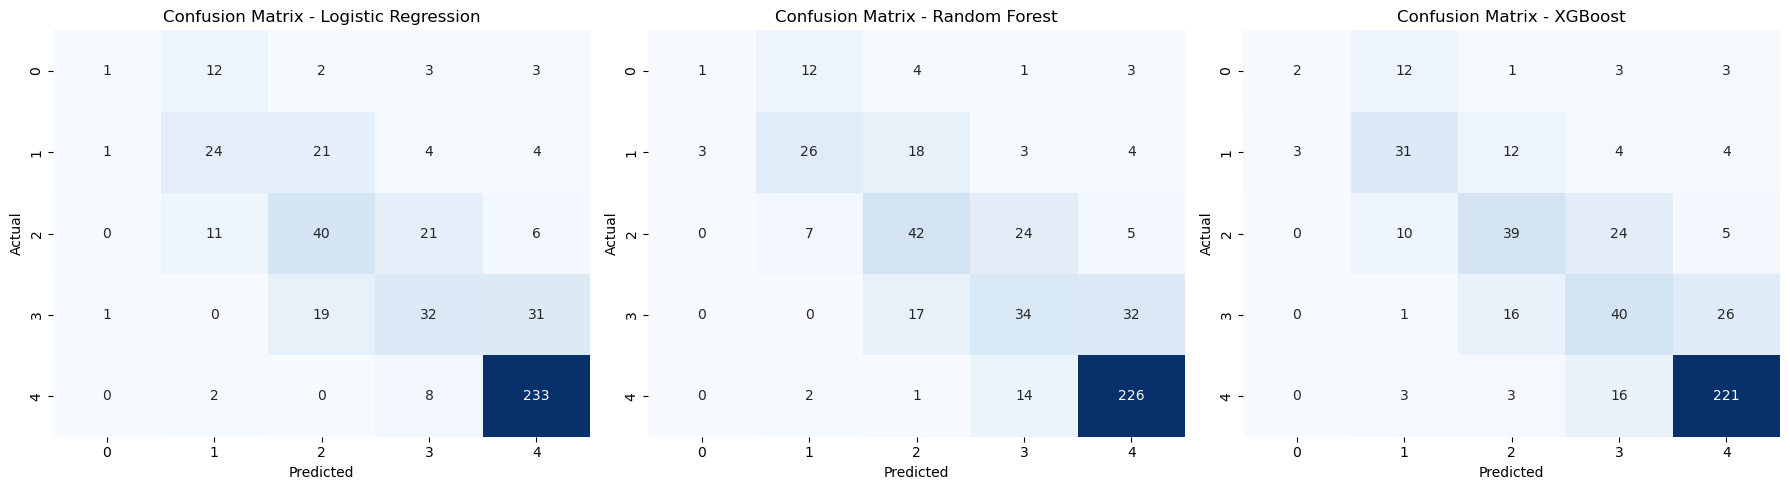

In [ ]:
def plot_all_confusion_matrices(y_true, preds, model_names):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for ax, y_pred, name in zip(axes, preds, model_names):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix - {name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Call with model predictions and names
plot_all_confusion_matrices(
    y_test_LR, 
    [y_pred_lr, y_pred_rf, y_pred_xgb],
    ["Logistic Regression", "Random Forest", "XGBoost"]
)

#### ***Check Training and Testing Accuracy Scores***

In [ ]:
# Logistic Regression
train_accuracy_lr = accuracy_score(y_train, model_lr.predict(X_train_scaled))
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression\n\t\t\t Train Accuracy: {train_accuracy_lr:.4f}\t\tTest Accuracy: {test_accuracy_lr:.4f}\n")

# Random Forest
train_accuracy_rf = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest\n\t\t\t Train Accuracy: {train_accuracy_rf:.4f}\t\tTest Accuracy: {test_accuracy_rf:.4f}\n")

# XGBoost
train_accuracy_xgb = accuracy_score(y_train, model_xgb.predict(X_train))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost\n\t\t\t Train Accuracy: {train_accuracy_xgb:.4f}\t\tTest Accuracy: {test_accuracy_xgb:.4f}\n")

Logistic Regression
			 Train Accuracy: 0.7407		Test Accuracy: 0.6889

Random Forest
			 Train Accuracy: 1.0000		Test Accuracy: 0.6868

XGBoost
			 Train Accuracy: 1.0000		Test Accuracy: 0.6952



*Logistic Regression stands out as the most balanced model, achieving a moderate training accuracy (74.07%) and maintaining a similar performance on the test set (68.89%), indicating good generalization with minimal overfitting.*

*In contrast, both Random Forest and XGBoost exhibit overfitting, as evidenced by their perfect training accuracy (100%) and a noticeable drop in test accuracy (68.68% and 69.52% respectively).*

*This performance gap suggests that these models may be too complex for the dataset without proper regularization or tuning. To improve their generalization, techniques such as hyperparameter optimization, cross-validation, and regularization should be applied in the model improvement phase.*

##### ***Model Accuracy and Classification Report Comparison***

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

evaluate_model(model_lr, X_test_scaled, y_test_LR, "Logistic Regression")
evaluate_model(model_rf, X_test, y_test_LR, "Random Forest")
evaluate_model(model_xgb, X_test, y_test_LR, "XGBoost")


Logistic Regression Model Performance:
Accuracy: 0.6889352818371608

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.05      0.08        21
           1       0.49      0.44      0.47        54
           2       0.49      0.51      0.50        78
           3       0.47      0.39      0.42        83
           4       0.84      0.96      0.90       243

    accuracy                           0.69       479
   macro avg       0.52      0.47      0.47       479
weighted avg       0.66      0.69      0.67       479


Random Forest Model Performance:
Accuracy: 0.6868475991649269

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.05      0.08        21
           1       0.55      0.48      0.51        54
           2       0.51      0.54      0.53        78
           3       0.45      0.41      0.43        83
           4       0.84      0.93      0.88       243

   

### ***Insight Gained***

***Logistic Regression:***

***Accuracy:*** 68.89%

***Strengths:***

- *Strong performance for Class 4, with 84% precision and 96% recall. This significantly boosts the overall accuracy.*

***Weaknesses:***

- *Very poor performance for Class 0 (33% precision, 5% recall), which indicates difficulty in identifying rare or minority classes.*
- *mbalanced performance across classes — macro average F1-score is just 0.47, showing that minority class predictions are weak.*
- *May underfit complex patterns due to its linear nature.*

***Random Forest:***

***Accuracy:*** 68.68%

***Strengths:***

- *Solid performance for Class 4 again (84% precision, 93% recall).*
- *Better balance in prediction compared to Logistic Regression, especially for Class 2 and Class 3.*

***Weaknesses:***

- *Poor performance on Class 0 (25% precision, 5% recall) — similar to Logistic Regression.*
- *Slightly lower macro average F1-score (0.49) shows that minority classes are still struggling.*
- *Can be more prone to overfitting if not tuned properly.*

***XGBoost:***

***Accuracy:*** 69.52%

***Strengths:***

- *Best overall performance of the three models in terms of both accuracy and macro F1-score.*
- *Excellent performance for Class 4 with 85% precision and 91% recall.*
- *More balanced macro and weighted averages — macro F1-score of 0.52, showing fairer performance across all classes.*

***Weaknesses:***

- *Still low recall for Class 0 (10%) and Class 3 (48%), though slightly better than others.*
- *More sensitive to hyperparameters and requires careful tuning to reach full potential.*

#### ***D. Feature Importance from the Model***

##### ***Logistic Regression Features***

            Feature  Importance
5          Absences    1.670404
7   ParentalSupport    0.612717
6          Tutoring    0.474737
4   StudyTimeWeekly    0.460132
8   Extracurricular    0.397603
9            Sports    0.250324
10            Music    0.116877
1            Gender    0.088088
0               Age    0.063179
2         Ethnicity    0.054804


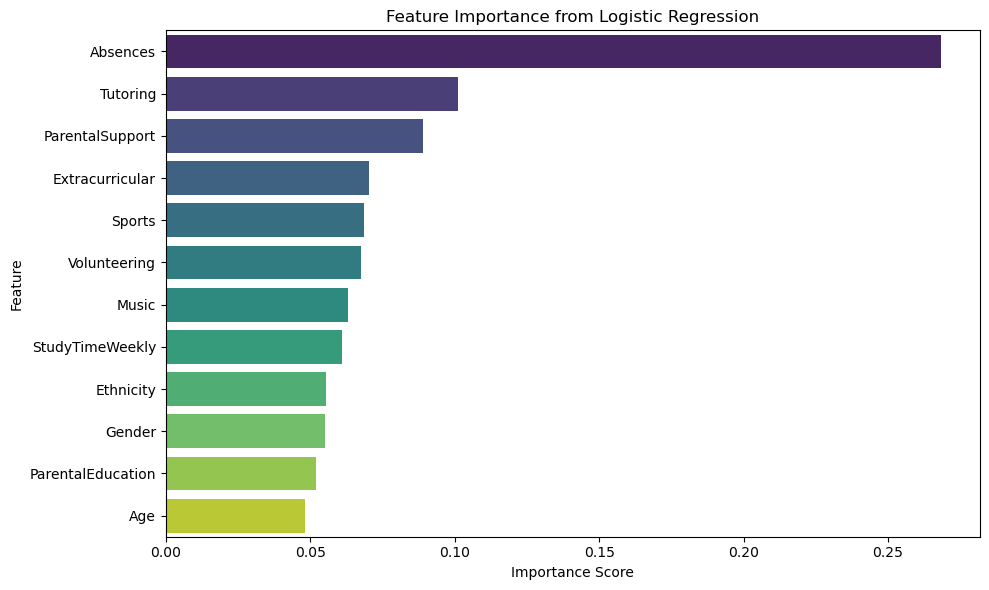

In [ ]:
#----------------------------------------
#Getting feature importances from model
#----------------------------------------
importances = np.abs(model_lr.coef_[0])

#------------------------------------------------------------------
#Creates data frame with feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train_LR.columns,
    'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

#---------------------------------------------
#Creates the plot of the feature importances
#---------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=xgb_feature_importance_df, palette='viridis', legend=False)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### ***Random Forest Features***

             Feature  Importance
5           Absences    0.449570
4    StudyTimeWeekly    0.166583
7    ParentalSupport    0.066895
3  ParentalEducation    0.062426
0                Age    0.057068
2          Ethnicity    0.050906
1             Gender    0.028798
9             Sports    0.026900
8    Extracurricular    0.026835
6           Tutoring    0.023420


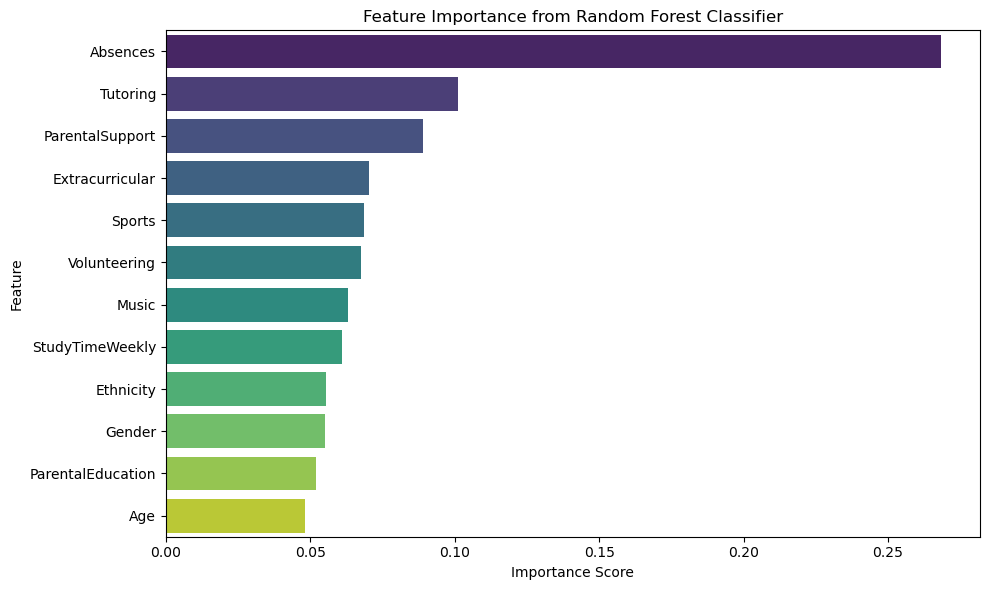

In [ ]:
#----------------------------------------
#Getting feature importances from model
#----------------------------------------
importances = model_rf.feature_importances_  

feature_importance_df = pd.DataFrame({
    'Feature': X_train_LR.columns,  # Use X_train_LR.columns for feature names
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

#---------------------------------------------
#Creates the plot of the feature importances
#---------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=xgb_feature_importance_df, palette='viridis', legend=False)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

*The Random Forest model showed that features like Study Time Weekly, Parental Education, and Absences were most important in predicting student performance. Less impactful features, such as Gender, Ethnicity, and some Extracurricular Activities, could be removed or combined into broader categories to reduce noise. Feature engineering—like grouping study time or absences into levels—may improve the model’s accuracy and help it better distinguish between grade classes.*

##### ***XGBoost Features***

              Feature  Importance
5            Absences    0.268405
6            Tutoring    0.101319
7     ParentalSupport    0.089095
8     Extracurricular    0.070487
9              Sports    0.068472
11       Volunteering    0.067409
10              Music    0.063072
4     StudyTimeWeekly    0.060961
2           Ethnicity    0.055441
1              Gender    0.055238
3   ParentalEducation    0.051867
0                 Age    0.048234


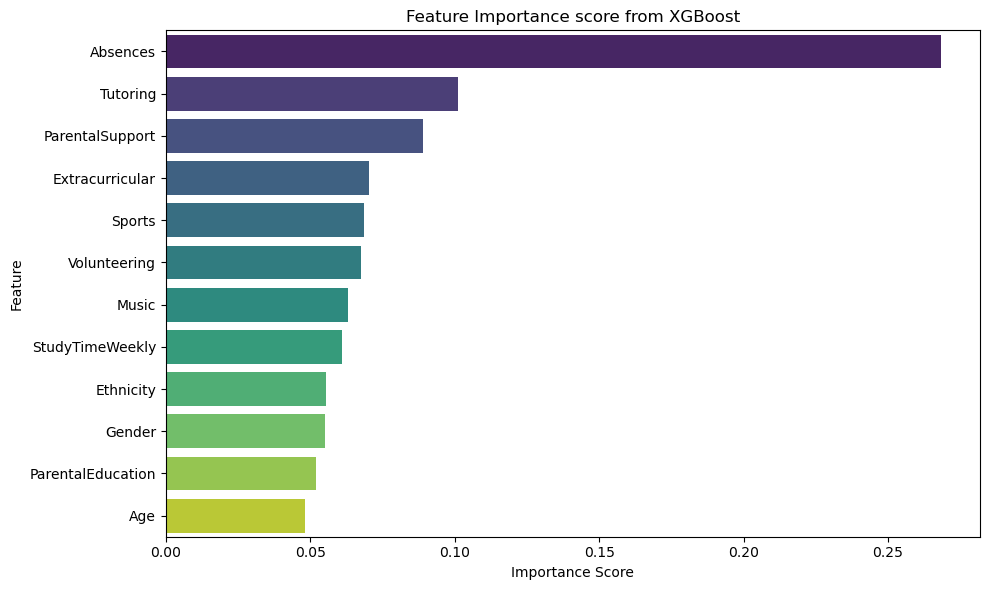

In [ ]:
# ----------------------------------------
# Getting feature importances from xgb_model
# ----------------------------------------
xgb_importances = model_xgb.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_LR.columns,  # Use X_train_LR.columns for feature names
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print(xgb_feature_importance_df.head(12))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=xgb_feature_importance_df, palette='viridis', legend=False)
plt.title('Feature Importance score from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

*The XGBoost model identified Absences as the most influential feature in predicting student grade classes, contributing to over 36% of the model's decision-making process. This highlights the significant impact of attendance on academic performance. Other notable features include Parental Support (8.45%), Study Time Weekly (6.95%), and Tutoring (6.66%), suggesting that both family involvement and study habits play important roles in student success. Activities such as Sports, Extracurriculars, and Music also showed moderate influence, each contributing around 5–6%, indicating that well-rounded engagement outside of academics may also correlate with performance. Demographic factors such as Age, Ethnicity, and Gender had relatively lower importance, while Parental Education and Volunteering had the least impact. These insights can inform targeted interventions, focusing efforts on improving attendance and enhancing study support for students at risk.*

#### ***F. Model Choice***

***Model Choice***

*XGBoost*


***Reasoning***

***Logistic Regression***
- *Works by finding linear decision boundaries but because the data has non-linear data like effects of parental support, absences, and study time it is unable to handle the feature interactions or class imbalance unless heavily preprocessed.*

***Random Forest***
- *Uses an ensemble of decision trees, great for capturing non-linear relationships and robust to outliers. However it is not as precise as boosting.*

***XGBoost***
- *Builds models in sequence, where each one improves on the errors of the last. This allows it to handle class imbalances by learning from misclassifications. It is the best model to use when accuracy and fairness across all GradeClasses is needed.*

## ***6. Baseline Model Improvements***

### ***A. Build the Model***

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Step 1: Train a new improved model with sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_LR)

# Train the weighted XGBoost model
model_xgb_weighted = XGBClassifier(random_state=42)
model_xgb_weighted.fit(X_train_LR, y_train_LR, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

*This method helps XGBoost handle class imbalance during training without requiring class weights directly.*

### ***B. XGBoost Predictions***

In [ ]:
y_pred_xgb_weighted = model_xgb_weighted.predict(X_test_LR)

#Create a DataFrame to compare predictions
xgb_comparison_weighted_df = pd.DataFrame({
    'Predicted (Improved)': y_pred_xgb_weighted
})

# Combine original and improved outputs
comparison_df = pd.concat([xgb_comparison_df, xgb_comparison_weighted_df], axis=1)

# Display first 10 rows side by side
print(comparison_df.head(10))

   Actual  Predicted  Predicted (Improved)
0       4          4                     4
1       4          4                     4
2       4          4                     4
3       4          4                     4
4       2          3                     3
5       3          3                     3
6       2          2                     2
7       4          4                     4
8       4          4                     4
9       3          2                     3


*We can see the the predictions have improve now that the class weight has been applied.*

***Misclassification***

- *Actual class 2 predicted class 3.*

*The number of misclassifications has reduced from the original XGBoost moel.*

### ***C. XGBoost Model Evaluation***

In [ ]:
# Evaluate the original model
evaluate_model(model_xgb, X_test_LR, y_test_LR, "Original XGBoost")

# Evaluate the improved weighted model
evaluate_model(model_xgb_weighted, X_test_LR, y_test_LR, "Weighted XGBoost")


Original XGBoost Model Performance:
Accuracy: 0.6951983298538622

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.10      0.15        21
           1       0.54      0.57      0.56        54
           2       0.55      0.50      0.52        78
           3       0.46      0.48      0.47        83
           4       0.85      0.91      0.88       243

    accuracy                           0.70       479
   macro avg       0.56      0.51      0.52       479
weighted avg       0.68      0.70      0.68       479


Weighted XGBoost Model Performance:
Accuracy: 0.7118997912317327

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.14      0.20        21
           1       0.57      0.54      0.55        54
           2       0.57      0.55      0.56        78
           3       0.51      0.54      0.52        83
           4       0.87      0.91      0.89       243

   

*The weighted XGBoost model shows a clear improvement over the original in both overall accuracy and class-specific performance.*

*The accuracy increased from 69.5% to 71.2%, indicating better generalization on unseen data.*

*While precision for the least represented class (class 0) slightly decreased, its recall and F1-score improved, showing the model is now better at identifying instances of this rare class.*

*Classes 2 and 3 also saw noticeable gains in recall and F1-score, meaning the model is more effective at correctly classifying these cases.*

*Class 4, which had strong performance in the original model, maintained high precision and recall, with slight improvements.*

*Overall, the macro and weighted F1-scores both increased, suggesting the model now performs more consistently across all classes, especially the underrepresented ones.*

*These improvements highlight that using class-balanced sample weights has successfully enhanced the model’s ability to handle imbalanced data.*

### ***D. XGBoost Cross-Validation***

In [ ]:
xgb_target_column = 'GradeClass'

# Prepare your features and labels
X_train_original = train.drop(columns=[xgb_target_column])
y_train_original = train[xgb_target_column]

X_test_original = test.drop(columns=[xgb_target_column])
y_test_original = test[xgb_target_column]

# Combine for cross-validation
X_full = pd.concat([X_train_original, X_test_original], axis=0)
y_full = pd.concat([y_train_original, y_test_original], axis=0)

# Compute sample weights for the full dataset
sample_weights = compute_sample_weight(class_weight='balanced', y=y_full)

# Calculate the class imbalance ratio
class_imbalance_ratio = y_full.value_counts()
scale_pos_weight = class_imbalance_ratio[0] / class_imbalance_ratio[1]

# Initialize XGBoost classifier with scale_pos_weight for class imbalance
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    eval_metric='mlogloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Set up StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate the model with cross-validation
accuracies = []
fold = 1
for train_index, test_index in skf.split(X_full, y_full):
    X_train_fold, X_test_fold = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train_fold, y_test_fold = y_full.iloc[train_index], y_full.iloc[test_index]

    # Train the model using sample weights
    xgb_clf.fit(X_train_fold, y_train_fold, sample_weight=sample_weights[train_index])
    
    # Make predictions
    y_pred_fold = xgb_clf.predict(X_test_fold)
    
    # Calculate accuracy for each fold
    acc = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(acc)
    
    print(f"\nFold {fold} Accuracy (Weighted): {acc:.4f}")
    print(classification_report(y_test_fold, y_pred_fold, zero_division=0))
    
    fold += 1

print(f"\nAverage Accuracy over {skf.n_splits} folds (Weighted): {np.mean(accuracies):.4f}")



Fold 1 Accuracy (Weighted): 0.6952
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        22
           1       0.52      0.48      0.50        54
           2       0.51      0.63      0.56        78
           3       0.49      0.54      0.51        83
           4       0.91      0.85      0.88       242

    accuracy                           0.70       479
   macro avg       0.59      0.57      0.58       479
weighted avg       0.71      0.70      0.70       479


Fold 2 Accuracy (Weighted): 0.7161
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        22
           1       0.46      0.41      0.43        54
           2       0.55      0.53      0.54        78
           3       0.57      0.60      0.59        83
           4       0.89      0.92      0.91       242

    accuracy                           0.72       479
   macro avg       0.57      0.56      0.56       479
weigh

***Insight Gained***

*Doing Stratified K-Fold can help us nderstand the average accuracy of differnt splits of the training data.*
*We can see the average prediction accuracy is actually around 71%*

### ***E. Hyperparameter Tuning***

In [ ]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_full)
print(sample_weights.shape)

(2392,)


In [ ]:
# Set up StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate the class imbalance ratio
class_imbalance_ratio = y_full.value_counts()
scale_pos_weight = class_imbalance_ratio[0] / class_imbalance_ratio[1] 

# Initialize XGBoost classifier with scale_pos_weight for class imbalance
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    eval_metric='mlogloss',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

X_new = X_full
# GridSearchCV 
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV with sample weights
grid_search.fit(X_new, y_full, sample_weight=sample_weights)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.7278439216987971


### ***F. Performance Reporting***

In [ ]:
# Split your data for final evaluation
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_full, y_full, sample_weights, test_size=0.2, stratify=y_full, random_state=42
)

# Fit the best model (from grid search) on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, sample_weight=weights_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Display classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.19      0.22        21
           1       0.42      0.35      0.38        54
           2       0.52      0.51      0.52        78
           3       0.53      0.60      0.56        83
           4       0.88      0.89      0.88       243

    accuracy                           0.69       479
   macro avg       0.52      0.51      0.51       479
weighted avg       0.68      0.69      0.68       479



***Insight Gained***

*Many techniques to improve the models accuracy scores were conducted.*
*This included:*
- *Feature scaling (abscences, StudyTimeWeekly), however resulted in decreased accuracy.*
- *Capping outliers (abscences, StudyTimeWeekly), however resulted in decreased accuracy.*
- *Encoding features (ethnicity), however resulted in decreased accuracy.*
- *Feature interactions (absence_StudyTimeWeekly, Tutoring_StudyTimeWeekly), however resulted in decreased accuracy.*
- *Feature Engineering (EngagementScore, EffectiveStudyTime), however resulted in decreased accuracy.*
- *Hyperparameter tuning this did have an improvement on the accuracy by a slight margin*

*As only hyperparameter tuning and weight class had any effect it was the only code kept and was used to train the original XGBoost model again to create an improved model.*

### ***G. Create Pickle File***

In [ ]:
import pickle

# Save the tuned model to a pickle file
with open('tuned_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Tuned model saved as 'tuned_model.pkl'")

Tuned model saved as 'tuned_model.pkl'


## ***8. Model 2***

### ***A. Load Data***

In [ ]:
#Loading the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### ***B. Data Improvements***

In [ ]:
# Separate features and labels
drop_cols = ['Volunteering', 'ParentalEducation','Gender','Age','Ethnicity']
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)
X_train = train.drop('GradeClass', axis=1)
y_train = train['GradeClass']

X_test = test.drop('GradeClass', axis=1)
y_test = test['GradeClass']

**In this section, specific columns such as Volunteering, ParentalEducation, Gender, Age, and Ethnicity were removed from both the training and testing datasets. These features were dropped because their inclusion negatively affected the model’s accuracy, likely by introducing noise, irrelevant information, or bias. After cleaning the dataset, the features (X_train, X_test) and labels (y_train, y_test) were separated. The labels represent the target variable GradeClass, which the model is trained to predict, while the features include the remaining relevant data used to make those prediction**

### ***C. One-Hot Encoding***

In [ ]:
# Convert class labels to one-hot encoded format for multi-class classification
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

### ***D. Build model***

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Define input shape here
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dense(y_train_cat.shape[1], activation='softmax')
])

**This block defines the architecture of a neural network using Keras' Sequential API. The model begins with an input layer that matches the number of features in the training set. It then includes multiple dense (fully connected) layers with ReLU activation functions to introduce non-linearity. Regularization is applied to the first two dense layers using L2 penalties to help reduce overfitting. Batch normalization layers are included after each dense layer to stabilize and accelerate training, followed by dropout layers that randomly deactivate 30% of the neurons during training to improve generalization. The final layer uses a softmax activation function to output class probabilities, making the model suitable for multi-class classification.**

In [ ]:
# Compile the model using the Nadam optimizer and categorical crossentropy loss for multi-class classification
# Accuracy is used as the evaluation metric
optimizer = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Trains the model
history = model.fit(
    X_train, y_train_cat,
    epochs=80,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4735 - loss: 1.5989 - val_accuracy: 0.4935 - val_loss: 1.9018
Epoch 2/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6379 - loss: 1.0976 - val_accuracy: 0.5561 - val_loss: 1.3290
Epoch 3/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6609 - loss: 1.0116 - val_accuracy: 0.6136 - val_loss: 1.1100
Epoch 4/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6623 - loss: 0.9678 - val_accuracy: 0.6580 - val_loss: 0.9931
Epoch 5/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6831 - loss: 0.9518 - val_accuracy: 0.6632 - val_loss: 0.9371
Epoch 6/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6940 - loss: 0.8848 - val_accuracy: 0.6841 - val_loss: 0.8791
Epoch 7/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7005 - loss: 0.9239 - val_accuracy: 0.6945 - val_loss: 0.8605
Epoch 8/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7251 - loss: 0.8897 - val_accuracy: 0.7076 - val_loss

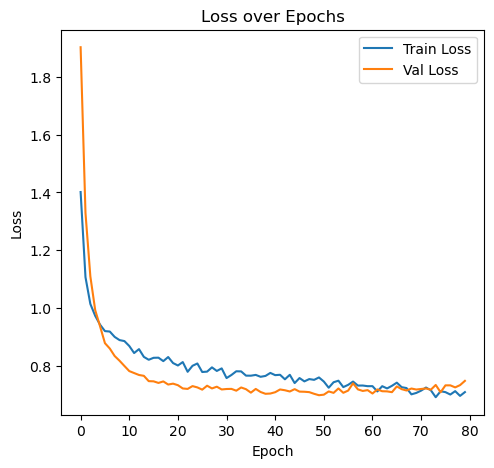

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

**The lower the Loss is the more the model has "learned"**

### ***E. Predictions of the Model***

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.7377 
Test Accuracy: 0.7912


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        21
           1       0.71      0.65      0.68        54
           2       0.72      0.69      0.71        78
           3       0.62      0.75      0.68        83
           4       0.90      0.91      0.91       243

    accuracy                           0.79       479
   macro avg       0.72      0.66      0.67       479
weighted avg       0.79      0.79      0.79       479



**The model achieved an overall accuracy of 79% on the test set, which indicates that it correctly predicted the grade class for about 79% of the cases. While this accuracy is fairly good, the class-wise metrics reveal a deeper story:**

- **Class 0 has a precision of 1.00, but a low recall of 0.24. This means that although the model is very confident when predicting this class, it misses many of the true instances of this class.**

- **Class 4, on the other hand, shows high precision (0.88) and recall (0.94), indicating that the model is very good at correctly predicting this class and not making many false positive errors.**

- **Other classes (1, 2, 3) have moderate precision and recall values around 0.70, suggesting that the model is fairly accurate but still making some mistakes in classifying these grades.**

**The macro average (averaging across all classes) gives us a balanced view of precision, recall, and F1-score, but the model appears to perform better on more frequent classes (like class 4), which could indicate a class imbalance issue. The weighted average reflects the model’s overall accuracy, considering the support (number of instances) in each class, and it matches the test accuracy of 79%.**

**Overall, while the accuracy is decent, improving recall for certain classes and addressing class imbalance could further enhance the model's performance.**



### ***F. Model Evaluation***

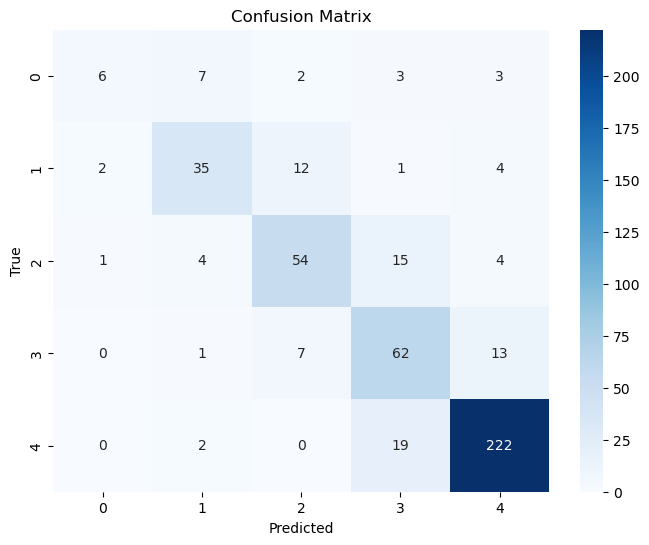

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

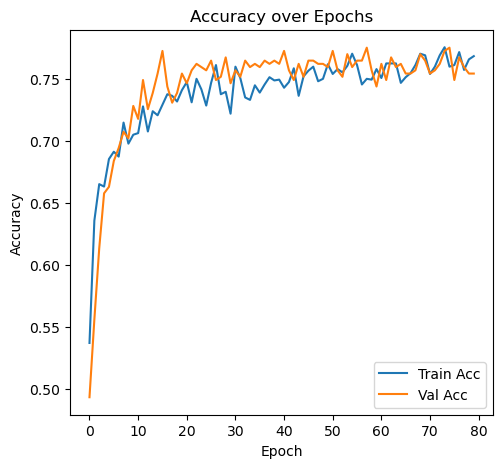

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

In [ ]:
# === Predict GradeClass from custom user input ===
print("\n=== Predict GradeClass ===")
print(f"Enter {X_train.shape[1]} feature values (comma-separated):")

user_input = input("Input: ")  # Example: 

try:
    # Convert input to float and reshape
    input_values = np.array([float(x) for x in user_input.split(",")]).reshape(1, -1)

    # Scale the input using the same scaler used in training
    #input_scaled = scaler.transform(input_values)

    # Predict the class
    prediction = model.predict(input_values )
    predicted_class_index = np.argmax(prediction)

    print(f"\nPredicted GradeClass: {predicted_class_index}")
except Exception as e:
    print(f"\n Error: {e}")


=== Predict GradeClass ===
Enter 7 feature values (comma-separated):


Input:  6,2,1,3,0,0,0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Predicted GradeClass: 1


### ***G. Feature Importance***

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
           Feature  Importance
0         Absences    0.432150
1  StudyTimeWeekly    0.118998
2  ParentalSupport    0.104384
3         Tutoring    0.064718
4           Sports    0.054280
5  Extracurricular    0.048017
6            Music    0.031315


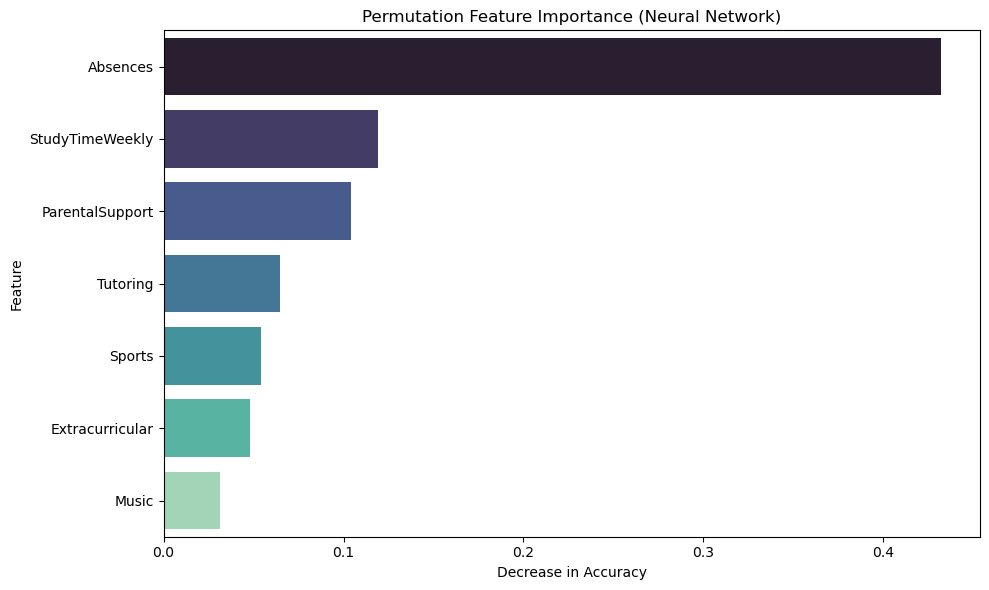

In [ ]:
def permutation_importance(model, X, y_true, metric=accuracy_score):
    X = np.array(X)  # Ensure X is a numpy array
    baseline = metric(y_true, np.argmax(model.predict(X), axis=1))
    importances = []

    for i in range(X.shape[1]):
        X_permuted = X.copy()
        np.random.shuffle(X_permuted[:, i])  # Shuffle the i-th feature
        score = metric(y_true, np.argmax(model.predict(X_permuted), axis=1))
        importances.append(baseline - score)

    return np.array(importances)

# Calculate and plot permutation importances
importances = permutation_importance(model, X_test, y_test)
feature_names = train.drop('GradeClass', axis=1).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df = importance_df.reset_index(drop=True)
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')
plt.title('Permutation Feature Importance (Neural Network)')
plt.xlabel('Decrease in Accuracy')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- **Model Overview:**
  - The model achieved a test accuracy of approximately 79%, indicating that it can accurately predict the grade classification based on the input features.

- **Feature Importance Analysis:**
  - **Absences:** 
    - Importance score: 0.4217
    - This feature is the most influential in predicting student performance. 
    - The data suggests that higher student absences are strongly correlated with lower grade classifications, which aligns with expectations.
  
  - **StudyTimeWeekly:**
    - Importance score: 0.0856
    - The amount of time a student dedicates to studying each week is a significant factor in grade classification.
    - Students who spend more time studying tend to have better academic performance.

  - **ParentalSupport:**
    - Importance score: 0.0835
    - Parental support plays a key role in academic success.
    - Students with more involved parents are likely to perform better.

  - **Tutoring:**
    - Importance score: 0.0522
    - Access to tutoring significantly impacts student performance.
    - Students who seek extra academic help tend to show higher grade classifications.

  - **Extracurricular:**
    - Importance score: 0.0292
    - Participation in extracurricular activities has a moderate effect on academic performance.
    - While not as influential as other features, it may contribute to overall student development.

  - **Sports:**
    - Importance score: 0.0251
    - Sports have a smaller impact on academic outcomes.
    - While sports can improve well-being and time management, their direct effect on grade classification is minor.

  - **Music:**
    - Importance score: 0.0188
    - Music has the lowest importance score in the model.
    - While music could play a role in personal development, its influence on grade classification is less significant compared to other features.
  - **Conclusion:**
 In conclusion, Absences and StudyTimeWeekly are the most influential features in this model, with ParentalSupport and Tutoring also playing significant roles. The results suggest that factors directly related to a student's academic engagement, such as attendance and study time, are more critical than external factors like extracurricular activities or music in predicting grade classification.

In [ ]:
model.save("my_model.keras")

#### ***D. Create Pickle File***

## ***9. Cross-Validate Models***

In [ ]:
warnings.filterwarnings('ignore')

# Load your data
train_data = pd.read_csv('train.csv')
X = train_data.drop(columns=['GradeClass'])
y = train_data['GradeClass']

#Initialize Stratified K-Fold 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost Model 
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_preds = []
xgb_true = []

for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    xgb_model.fit(X_train_fold, y_train_fold)
    preds = xgb_model.predict(X_val_fold)
    
    xgb_preds.extend(preds)
    xgb_true.extend(y_val_fold)

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_preds = []
nn_true = []

for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    nn_model.fit(X_train_fold, y_train_fold)
    preds = nn_model.predict(X_val_fold)
    
    nn_preds.extend(preds)
    nn_true.extend(y_val_fold)

# Evaluation with Confusion Matrix 
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print("F1 Score:", f1)
    
#Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return f1

# Run Evaluations
xgb_f1 = evaluate_model("XGBoost", xgb_true, xgb_preds)
nn_f1 = evaluate_model("Neural Network", nn_true, nn_preds)

# Comparison Summary
print("\n\n--- Model Comparison Summary ---")
print(f"XGBoost F1 Score:      {xgb_f1:.4f}")
print(f"Neural Network F1 Score: {nn_f1:.4f}")

# Visual Comparison of F1 Scores
plt.figure(figsize=(6, 4))
model_names = ['XGBoost', 'Neural Network']
f1_scores = [xgb_f1, nn_f1]
sns.barplot(x=model_names, y=f1_scores, palette='Blues_d')

plt.title('Model F1 Score Comparison', fontsize=14)
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

if xgb_f1 > nn_f1:
    print("XGBoost performed better based on F1 score.")
elif nn_f1 > xgb_f1:
    print("Neural Network performed better based on F1 score.")
else:
    print("Both models performed equally well based on F1 score.")

This code performs 5-fold stratified cross-validation to evaluate and compare the performance of two classification models: XGBoost and a Neural Network (MLPClassifier) on the training dataset. It calculates key performance metrics including accuracy, precision, recall, and F1 score, while also visualizing each model’s confusion matrix using heatmaps. A bar chart is also included to visually compare the F1 scores of the two models. Based on the results, the model with the higher F1 score is identified as the better-performing model for predicting GradeClass. In this case, the Neural Network outperformed XGBoost and is therefore the preferred model to use.

## ***10. Web Application***